## Credit Card Fraud Detection

### Submitted By:
    Sindhu Hanumanthu (sindhuhanumanthuh@gmail.com)
    Veena M (veena.m.387@gmail.com)

### Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

### Steps Followed

In order to complete the project, we are going to follow below high level steps to build and select best model.
- Reading the dataset and performing exploratory data analysis
- Building different classification models on the unbalanced data
    - Logistic Regression
    - Decision Tree
    - Random Forest
    - XGBoost
- Building different models on 3 different balancing technique.
    - Random Oversampling
        - Logistic Regression
        - Decision Tree
        - Random Forest
        - XGBoost
    - SMOTE
        - Logistic Regression
        - Decision Tree
        - Random Forest
        - XGBoost
    - ADASYN
        - Logistic Regression
        - Decision Tree
        - Random Forest
        - XGBoost

In [3]:
# Importing computational packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

# from sklearn import metrics
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#from sklearn.externals.six import StringIO
from sklearn.pipeline import Pipeline
from IPython.display import Image
import pydotplus

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Set max rows and columns for display
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_rows', 500)

In [217]:
# Reading the .csv file

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data

df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        2

### Handling Missing Values

In [8]:
# Checking for the missing value present in each columns

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that there is no missing value present in the dataframe.

### Exploratory Data Analysis

In [9]:
features = [col for col in df if col.startswith('V')] + ['Amount'] + ['Time']

# Defining some functions to perform univariate and bivariate analysis of the features
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def univariate(x):
    if data_type(x) == 'numerical':
        sns.distplot(x)
    
    elif data_type(x) == 'categorical':
        sns.countplot(x)
    
    
def bivariate(x1, x2):
    if data_type(x1) == 'numerical' and data_type(x2) == 'numerical':
        sns.regplot(x1, x2)
    elif (data_type(x1) == 'categorical' and data_type(x2) == 'numerical') or (data_type(x1) == 'numerical' and data_type(x2) == 'categorical'):        
        sns.boxplot(x1, x2)
        plt.yscale('log')

### Univariate Analysis

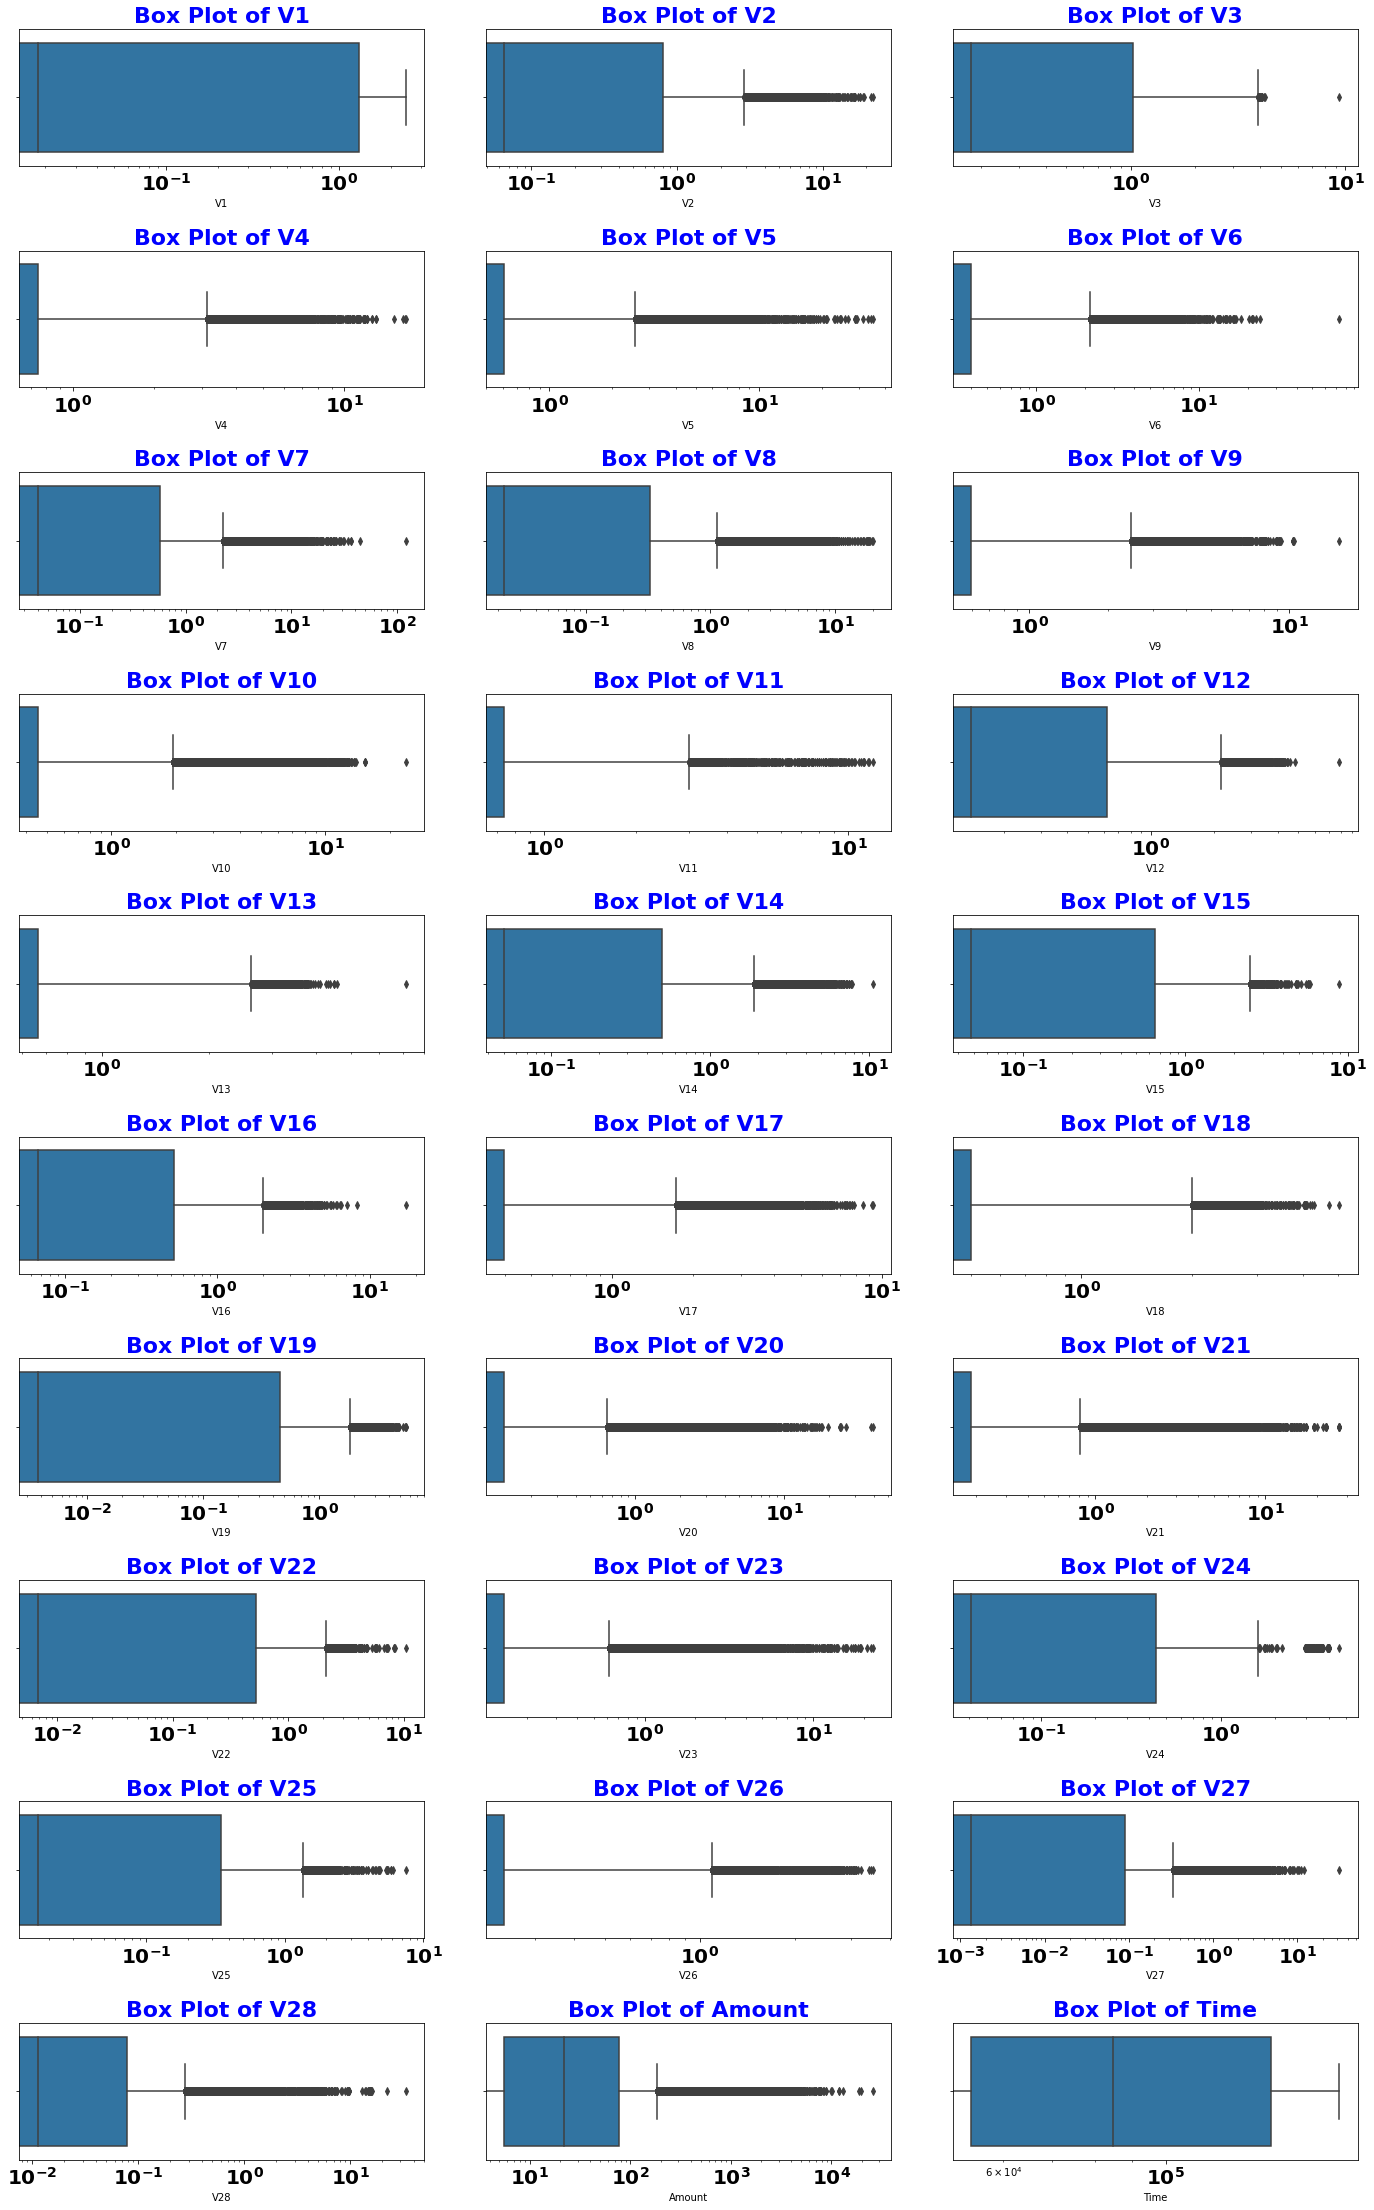

In [10]:
# Box plots of all numerical columns
plt.figure(figsize= (20,80))
for i in enumerate (features):
    plt.subplot(21,3,i[0]+1)
    plt.title('Box Plot of ' + i[1], fontweight = 'bold', color = 'blue', fontsize = 22)
    plt.xscale('log')
    plt.xticks(fontweight = 'bold', fontsize = 20)
    sns.boxplot(df[i[1]])
    plt.tight_layout(pad=4.0)
    plt.subplots_adjust(top=0.8)

### Bivariate Analysis

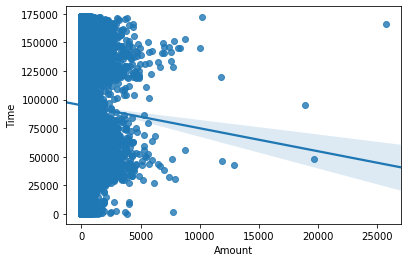

In [11]:
# Comparing Amount with Time
bivariate(df.Amount, df.Time)

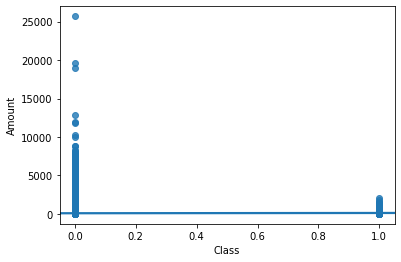

In [12]:
# Comparing Class with Amount

bivariate(df.Class, df.Amount)

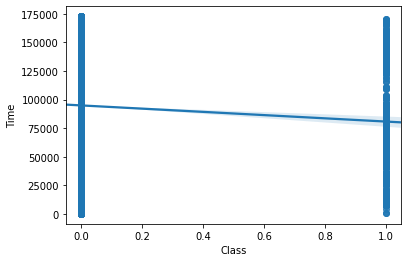

In [13]:
# Comparing Class with Amount

bivariate(df.Class, df.Time)

Here we will observe the distribution of our classes

In [14]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("Normal Share: ", normal_share)
print("Fraud Share: ", fraud_share)

Normal Share:  99.82725143693798
Fraud Share:  0.1727485630620034


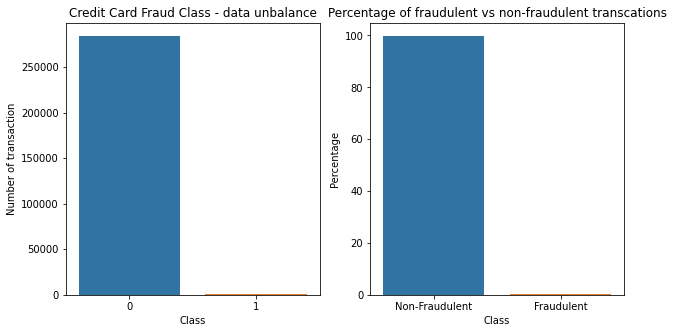

In [15]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

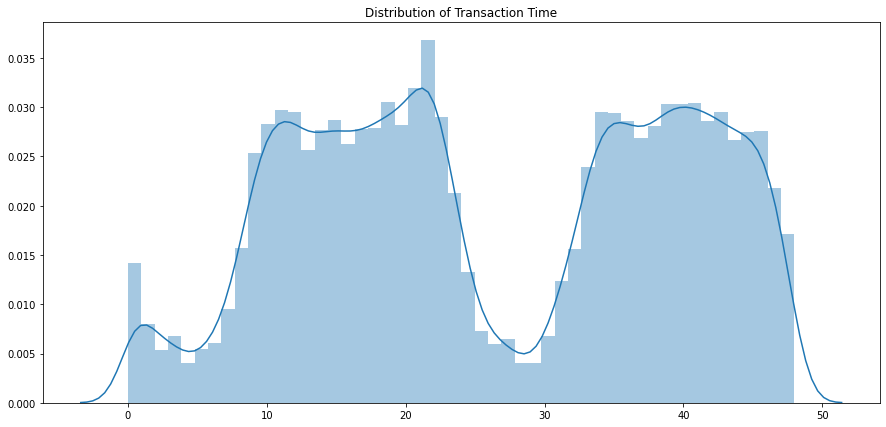

In [220]:
# Create a scatter plot to observe the distribution of classes with time

# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df['Time'].values/(60*60))
plt.show()

**Observation**

There is not much insight can be drwan from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

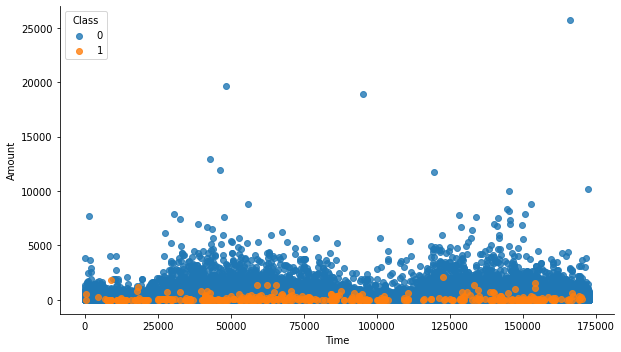

In [17]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.lmplot('Time', 'Amount', df, hue='Class', fit_reg = False, legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.legend('01', ncol = 1, loc='upper left', title = 'Class');
plt.show()

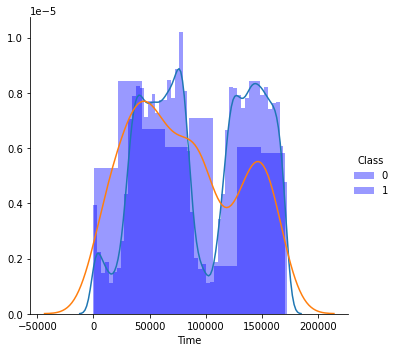

In [18]:
# Check the distribution of classes against Time
sns.FacetGrid(df, hue="Class", size=5).map(sns.distplot, "Time", rug_kws={"color":"g"},
                                           hist_kws={"linewidth": 3, "color": "b"}).add_legend()
plt.show()

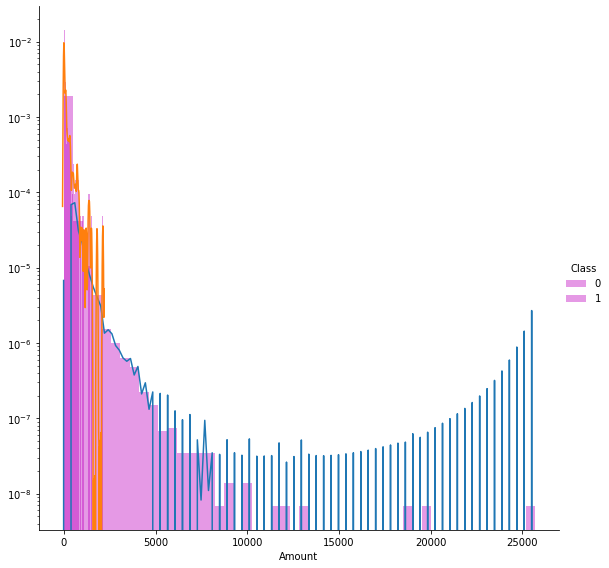

In [19]:
# Check the density of classes against Amount

sns.FacetGrid(df, hue="Class", size=8).map(sns.distplot, "Amount", rug_kws={"color":"g"},
                                           hist_kws={"linewidth": 3, "color": "m"}).add_legend()
plt.yscale('log')
plt.show()

<font color='blue' size='3'><b>Observations / Results:</font>
- There is huge ovelap in distribution of fradulant and non-fradulant data and we cannot conclude anything distinctively when camparing the classes with Time.
- Also, from the distribution plot of class vs Amount, it is noticed that the amount of fradulant transaction is less than 2500.

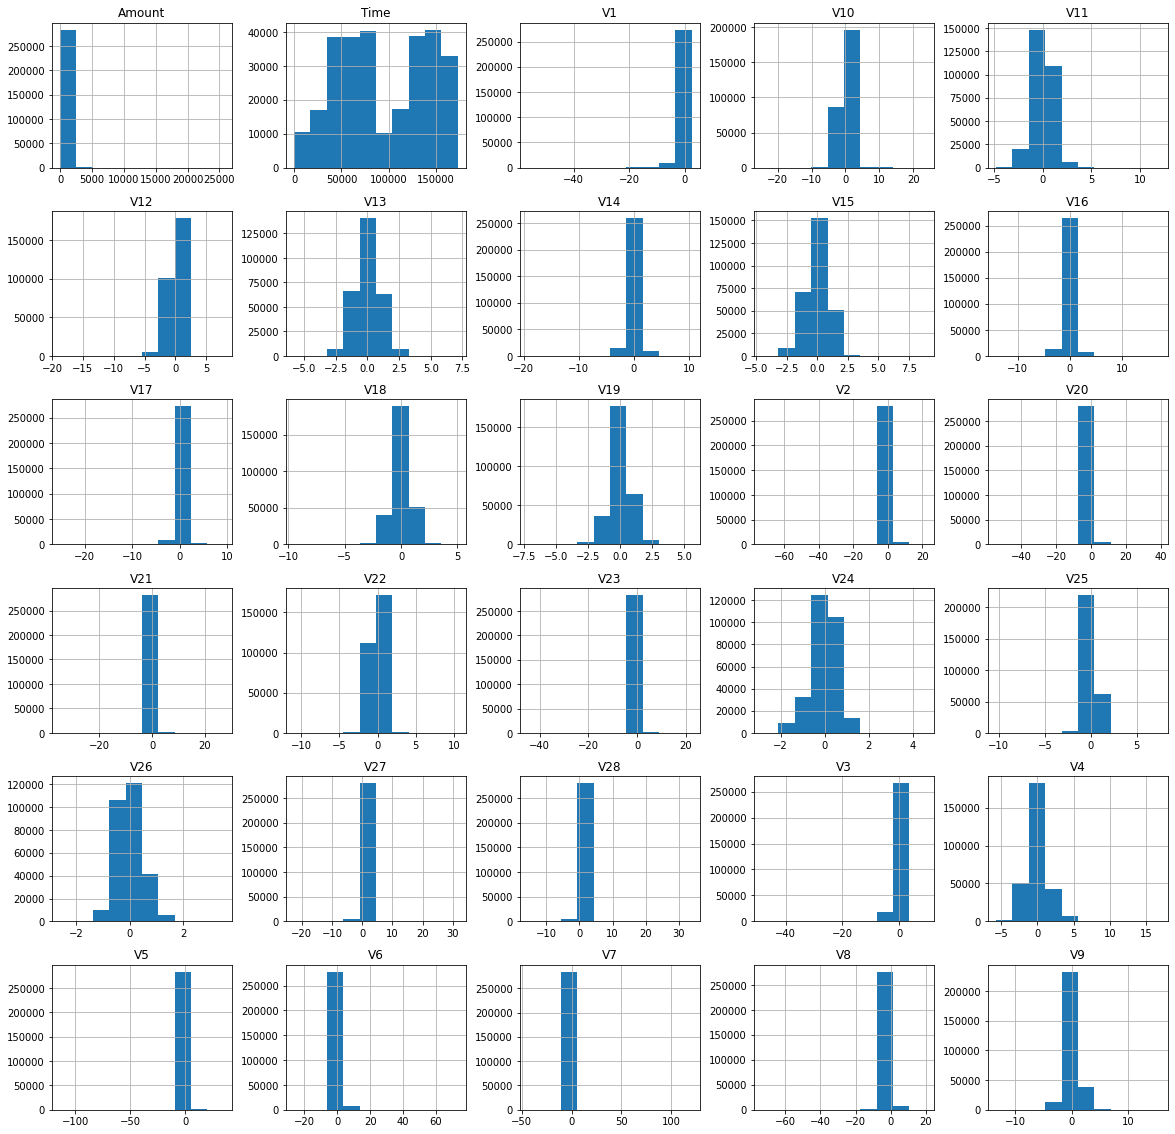

In [20]:
# Lets have a look at the other input variables data and see if they need to be standardized/scaled
#features = ['V%d' % number for number in range(1, 29)] 
features = [col for col in df if col.startswith('V')] + ['Amount'] + ['Time']
X = df[features]
X.hist(figsize = (20, 20))
plt.show()

### Crosstab with Class variable

In [21]:
# Crosstab of class with Amount

pd.crosstab(df.Class, df.Amount, normalize='columns')*100

Amount,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.10,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.50,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.60,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.70,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.80,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89,1.90,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.00,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09,2.10,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.20,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.30,2.31,2.32,2.33,2.34,2.35,2.36,2.37,2.38,2.39,2.40,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50,...,3106.44,3113.91,3115.67,3118.00,3119.00,3135.00,3152.32,3153.32,3159.00,3164.76,3165.51,3167.74,3168.80,3169.73,3178.90,3180.00,3185.75,3199.21,3200.00,3202.91,3208.53,3208.62,3209.00,3209.39,3231.27,3237.21,3249.73,3253.61,3268.19,3291.00,3297.90,3307.14,3317.33,3319.20,3320.87,3335.73,3336.00,3347.84,3352.44,3360.00,3362.00,3363.79,3378.00,3379.60,3382.00,3383.28,3386.00,3394.61,3400.00,3405.06,3416.79,3418.41,3419.12,3424.92,3425.00,3449.97,3454.92,3460.56,3463.60,3465.66,3468.00,3480.88,3492.39,3497.70,3500.00,3502.11,3502.13,3507.54,3510.95,3516.12,3521.42,3526.23,3546.00,3552.96,3556.43,3561.84,3563.19,3576.45,3588.64,3590.45,3595.72,3603.26,3605.12,3605.62,3610.00,3617.00,3629.22,3648.57,3651.81,3655.11,3669.00,3669.42,3670.00,3679.64,3684.62,3690.24,3692.76,3693.00,3721.40,3728.45,3740.25,3745.52,3758.25,3759.39,3763.67,3769.60,3774.70,3783.15,3789.80,3790.39,3803.29,3804.63,3820.00,3820.86,3821.79,3828.04,3848.01,3849.85,3882.66,3889.00,3896.83,3898.37,3907.90,3908.00,3917.92,3929.03,3932.50,3937.13,3974.58,3980.00,3990.12,3995.92,3995.94,4000.00,4002.00,4002.88,4008.36,4012.24,4024.33,4041.20,4063.17,4080.30,4097.40,4099.30,4102.74,4103.75,4106.04,4111.00,4112.89,4140.20,4171.80,4190.00,4229.51,4248.34,4249.73,4275.58,4276.82,4281.72,4290.00,4313.82,4323.08,4337.00,4338.25,4350.00,4351.10,4361.17,4377.98,4395.34,4457.43,4462.71,4465.04,4476.72,4487.49,4500.00,4543.64,4584.88,4585.00,4627.10,4633.95,4642.20,4644.25,4651.39,4652.24,4675.00,4692.65,4726.30,4738.79,4781.44,4833.00,4861.64,4901.00,4905.00,4907.01,4956.31,4959.85,5026.26,5114.10,5130.30,5239.50,5259.00,5268.04,5303.69,5317.28,5341.41,5356.42,5420.61,5446.07,5627.06,5657.54,5667.56,5680.00,5707.82,5714.20,5714.58,5918.00,5934.90,5964.95,6000.00,6130.21,6239.54,6454.74,6511.00,6652.89,6669.00,6828.00,6900.47,6950.51,6982.67,6998.00,7367.00,7429.15,7541.70,7583.32,7636.30,7712.43,7766.60,7862.39,7879.42,8182.70,8360.00,8787.00,8790.26,10000.00,10199.44,11789.84,11898.09,12910.93,18910.00,19656.53,25691.16
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,98.520548,99.303621,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,85.714286,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,

<font color='blue' size='3'><b>Observations / Results:</font>
- As mentioned in project pipeline, the variables V1 to V28 are the gaussian variables and hence it is not necessary to perform the scaling again for these variables.
- The Amount variable looks highly skewed. Hence, it is necessary to scale this variable, so that it skewness should not impact the model building.
- Time variable, however can be dropped as it is not very important for our analysis.

Dropping `Time` column as this feature is not going to help in the model building.

In [22]:
# Drop unnecessary columns

df.drop(['Time'],axis = 1, inplace = True)

<Figure size 432x288 with 0 Axes>

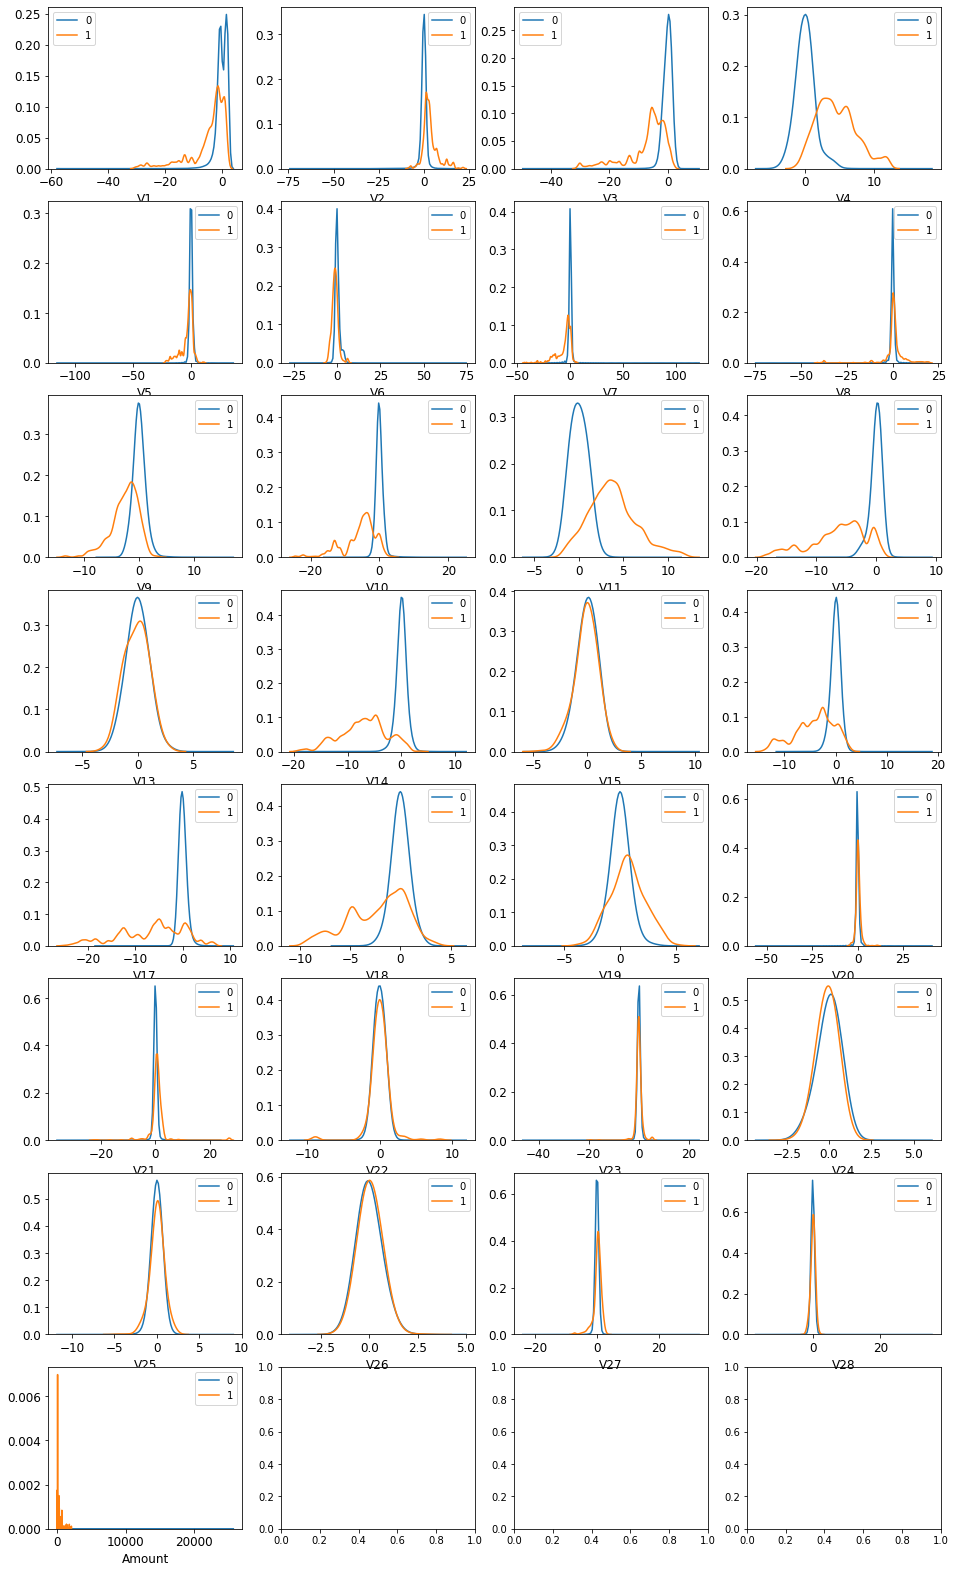

In [23]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

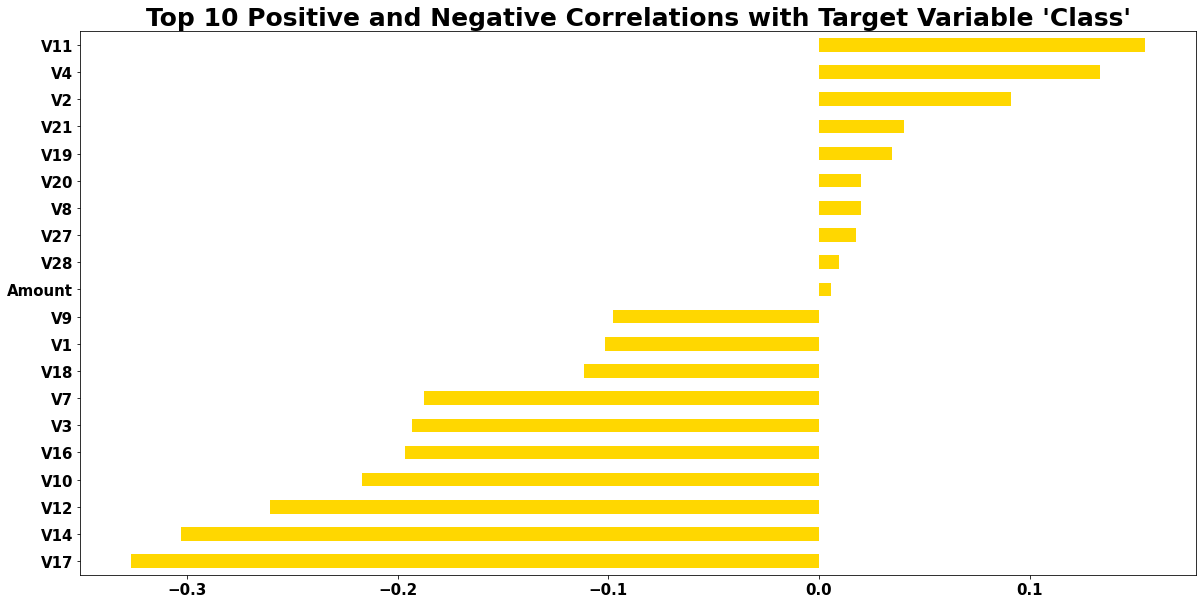

In [24]:
# Check high correlation with "Class"
corr_pos_top_10 = df.corr()["Class"].sort_values()[::-1][:11]
corr_pos_top_10.drop('Class', inplace=True)
corr_neg_top_10 = df.corr()["Class"].sort_values()[:10]
top_10_corr_pos_neg = pd.concat([corr_pos_top_10,corr_neg_top_10]).sort_values()
top_10_corr_pos_neg

# Top 10 Positive and Negative Correlations with Target Variable 'Class'
top_10_corr_pos_neg.plot(kind = "barh", color='gold', figsize=(20,10))
plt.title("Top 10 Positive and Negative Correlations with Target Variable 'Class'", weight='bold', fontsize = 25)
plt.xticks(fontweight = 'bold', fontsize = 15)
plt.yticks(fontweight = 'bold', fontsize = 15)
plt.show()

#### Heat Map for Top 10 Positive and Negative Correlated Variables with Target Variable 'Class'

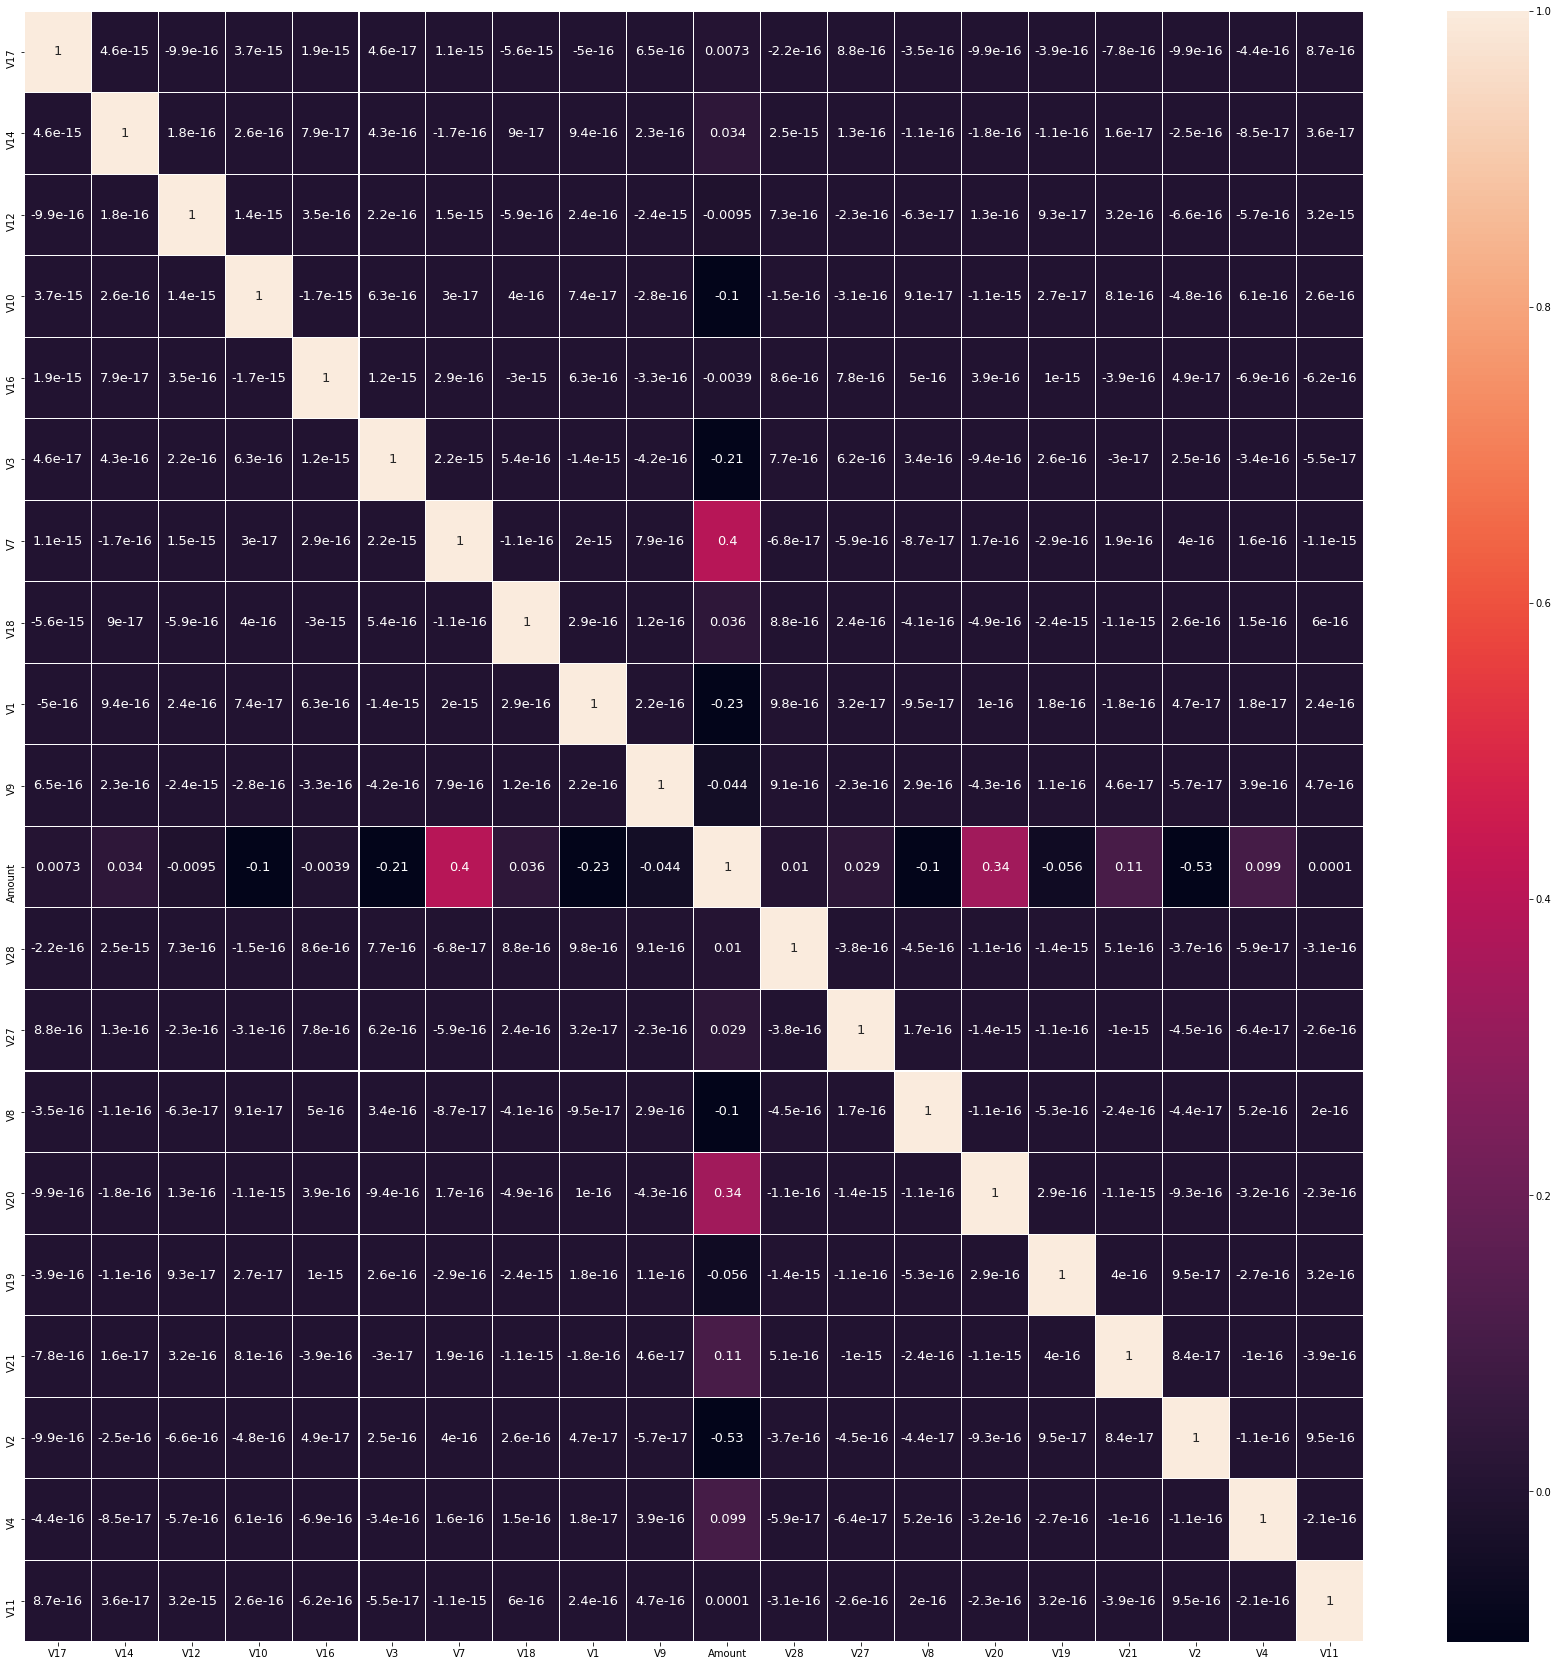

In [25]:
# Heat Map for Top 10 Positive and Negative Correlated Variables with Target Variable 'Class'
top_10_corr_pos_neg_vars = top_10_corr_pos_neg.keys().tolist()
plt.figure(figsize=(30,30))
sns.heatmap(df[top_10_corr_pos_neg_vars].corr(), linewidths=0.05, linecolor="white", annot=True, robust = True, annot_kws={'size':13});

### Splitting the data into train & test data

In [26]:
y = df["Class"]  #class variable
X = df.drop("Class", axis = 1)

In [27]:
from sklearn import model_selection

# Spltting the into 80:20 train test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

# print shapes of train and test sets
print("X Train: {}".format(X_train.shape))
print("Y Train: {}".format(y_train.shape))
print("X Test: {}".format(X_test.shape))
print("Y Test: {}".format(y_test.shape))

X Train: (227845, 29)
Y Train: (227845,)
X Test: (56962, 29)
Y Test: (56962,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [28]:
print("Total number of records in Y (Class = 1): ", np.sum(y))
print("Number of records in Y Train (Class = 1): ", np.sum(y_train))
print("Number of records in Y Test (Class = 1): ", np.sum(y_test))

Total number of records in Y (Class = 1):  492
Number of records in Y Train (Class = 1):  394
Number of records in Y Test (Class = 1):  98


In [29]:
100*df['Class'].value_counts(normalize = True)

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [30]:
100*y_train.value_counts(normalize = True)

0    99.827075
1     0.172925
Name: Class, dtype: float64

### Plotting the distribution of a variable

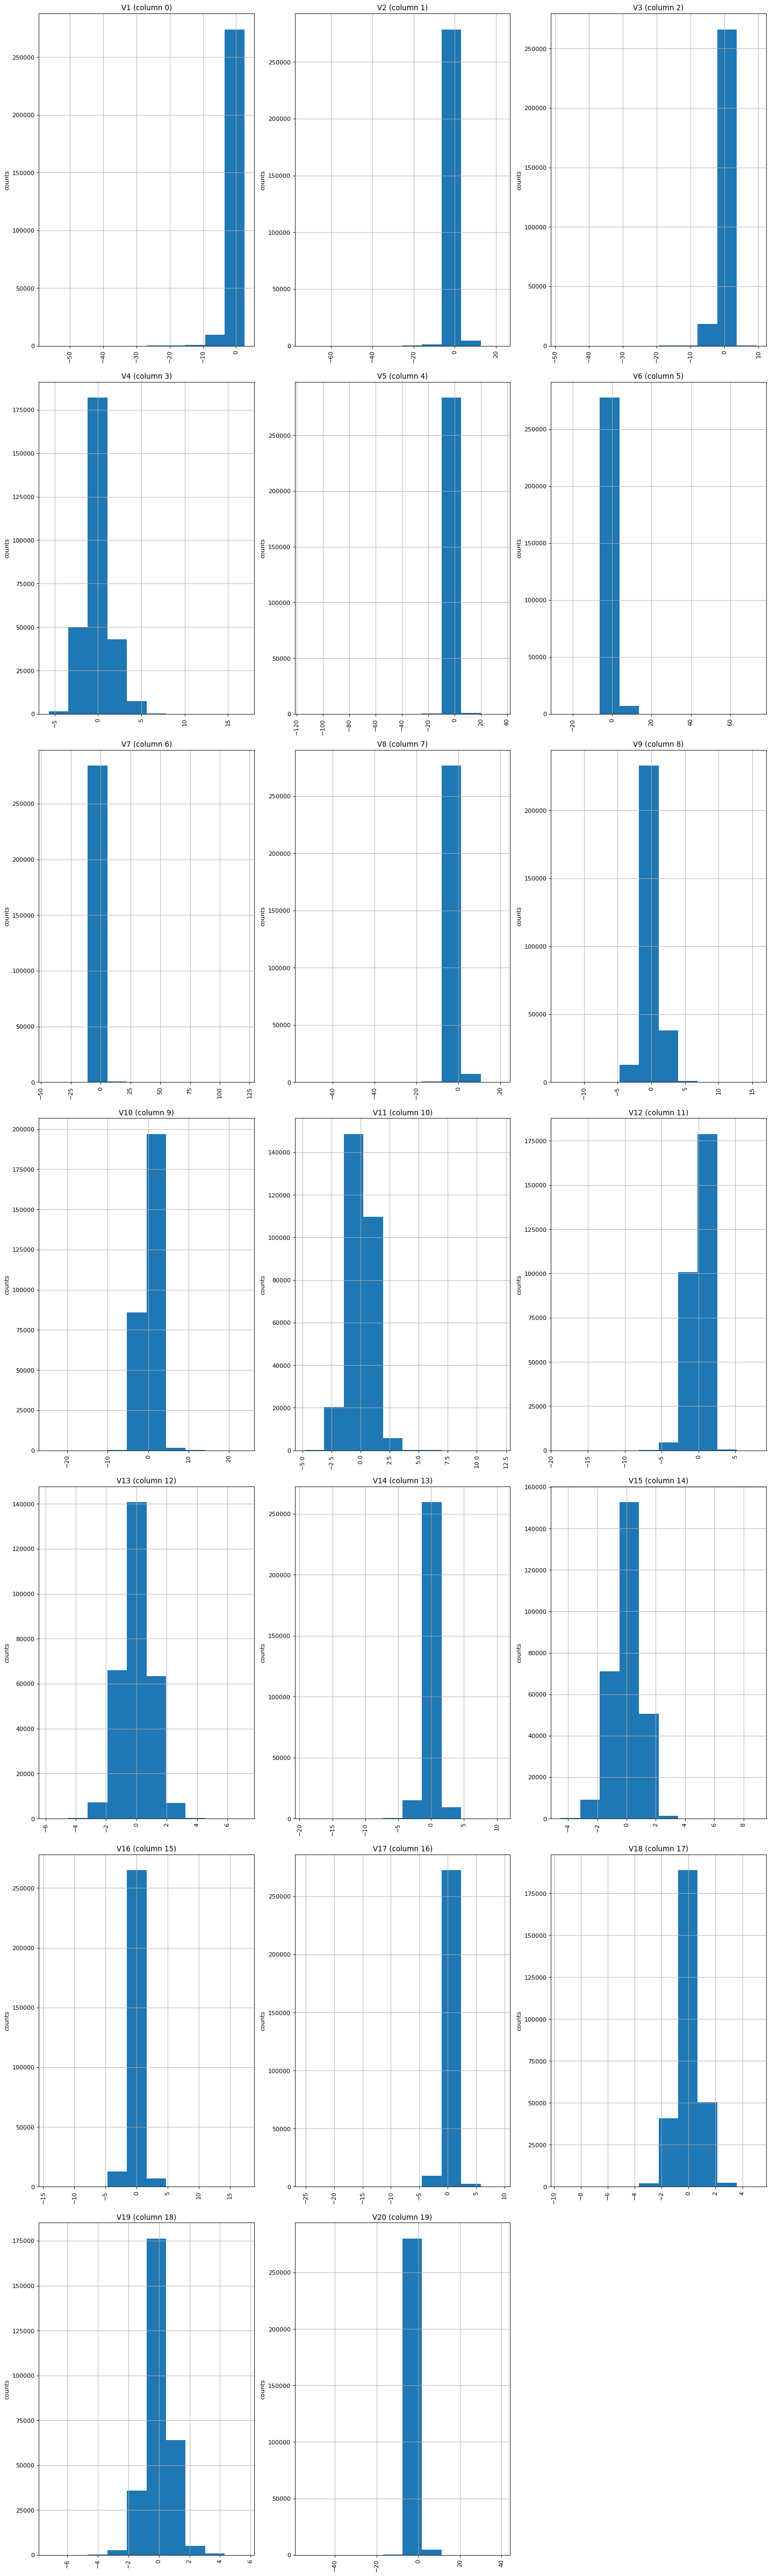

In [31]:
# plot the histogram of a variable from the dataset to see the skewness
# Define a function to check the individual column level data distribution

def ColumnDistributionPlot(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
# calling the function to plot the graphs
ColumnDistributionPlot(df, 20, 3)

<font color='blue' size='3'><b>Observations / Results:</font>
- The above histogram plots indicates that some of the variables are skewed.
- As instructed we can apply power transformation for the data to mitigate the skewness
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

### Feature Scaling using Standard Scaler on 'Amount' field and PowerTransformer on the other skewed features

In [32]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [33]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281


In [34]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-0.259954
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.304426
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-0.048286
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.347741
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.345707


### Plotting the distribution of a variable

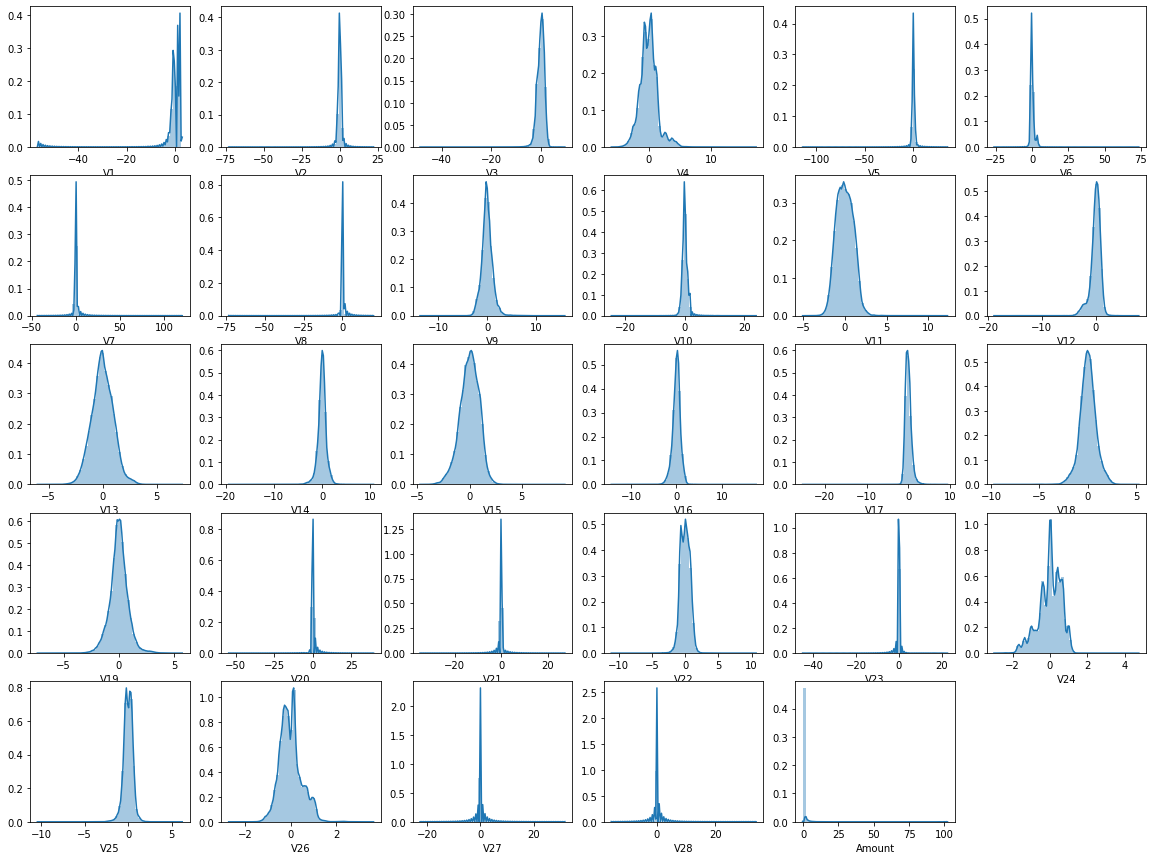

In [35]:
# plot the histogram of a variable from the dataset to see the skewness

var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

### Using PowerTransformer Scaling

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [36]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.306334,-4.779484,-2.247962,0.687574,-2.786851,1.937381,3.152665,-8.639485,0.541869,1.132688,0.354102,-2.286654,0.064819,-1.969112,-0.308419,-1.077909,-3.733377,-0.254948,0.106133,-1.960492,3.490183,-0.219171,-6.258558,-0.549854,-0.436292,0.57498,-0.890209,9.978409,18.193943


In [37]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


In [38]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer(copy = False)
pt.fit(X_train)                       ## Fit the PT on training data

X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

# Here we are doing the same thing, but for the dependent variable 'SalePrice' exclusively
pt_y = PowerTransformer(method='yeo-johnson', standardize=True)

# PowerTransformer requires a matrix
pt_y.fit(y_train.to_frame())
 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

In [39]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
print(pt.fit(X_train))
print(pt.fit(X_test))

PowerTransformer(copy=False, standardize=True)
print(pt.lambdas_)
print(pt.transform(X_train))

PowerTransformer()
PowerTransformer()
[1.06810444 0.94977112 0.99565264 1.02235828 0.9899256  1.0288186
 1.02564056 0.92589788 0.99631822 1.00231277 0.98450548 0.95947009
 0.99930111 0.98182029 1.00015829 1.00280185 0.99630269 0.99920359
 0.99822088 1.00083983 1.00684606 0.9888876  0.98330463 1.00650766
 0.97659477 0.99531606 1.04269831 0.96214477 0.18647557]
[[ 1.3605171  -0.53244116 -0.96558825 ...  0.1762677  -0.07933186
  -0.8590991 ]
 [ 1.45568453 -0.10369511 -1.77797085 ... -0.01708289 -0.19324092
  -1.12780117]
 [-0.76227965  0.33578723  0.39844893 ...  0.07402211  0.57794286
   1.40691968]
 ...
 [ 0.5072543  -0.02531451  0.22080831 ...  0.05593375  0.09599499
   0.51935218]
 [ 0.69659588  0.12694562  0.09157218 ... -0.17546748  0.00183202
  -1.26914918]
 [-0.59068117  0.45751628  1.42578307 ...  0.97482036  0.64011177
  -0.87854251]]


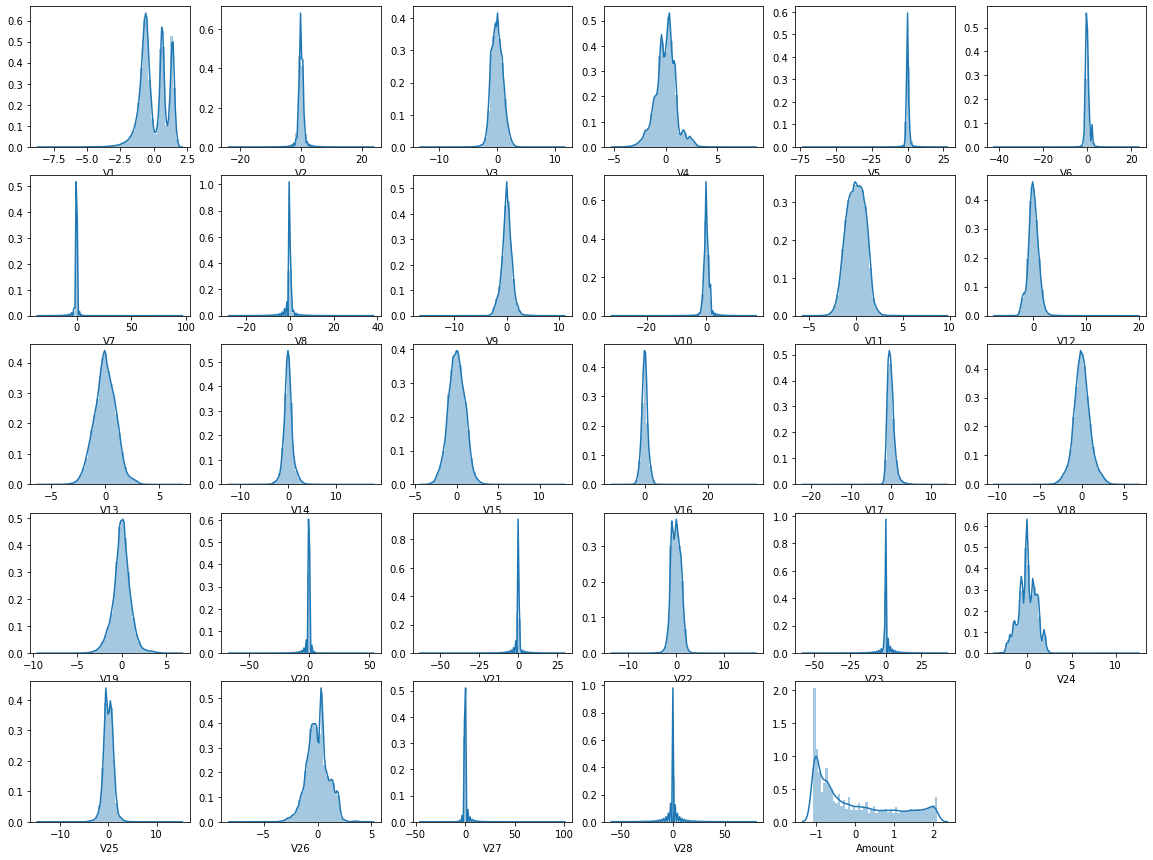

In [40]:
# plot the histogram of a variable from the dataset again to see the result 

var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

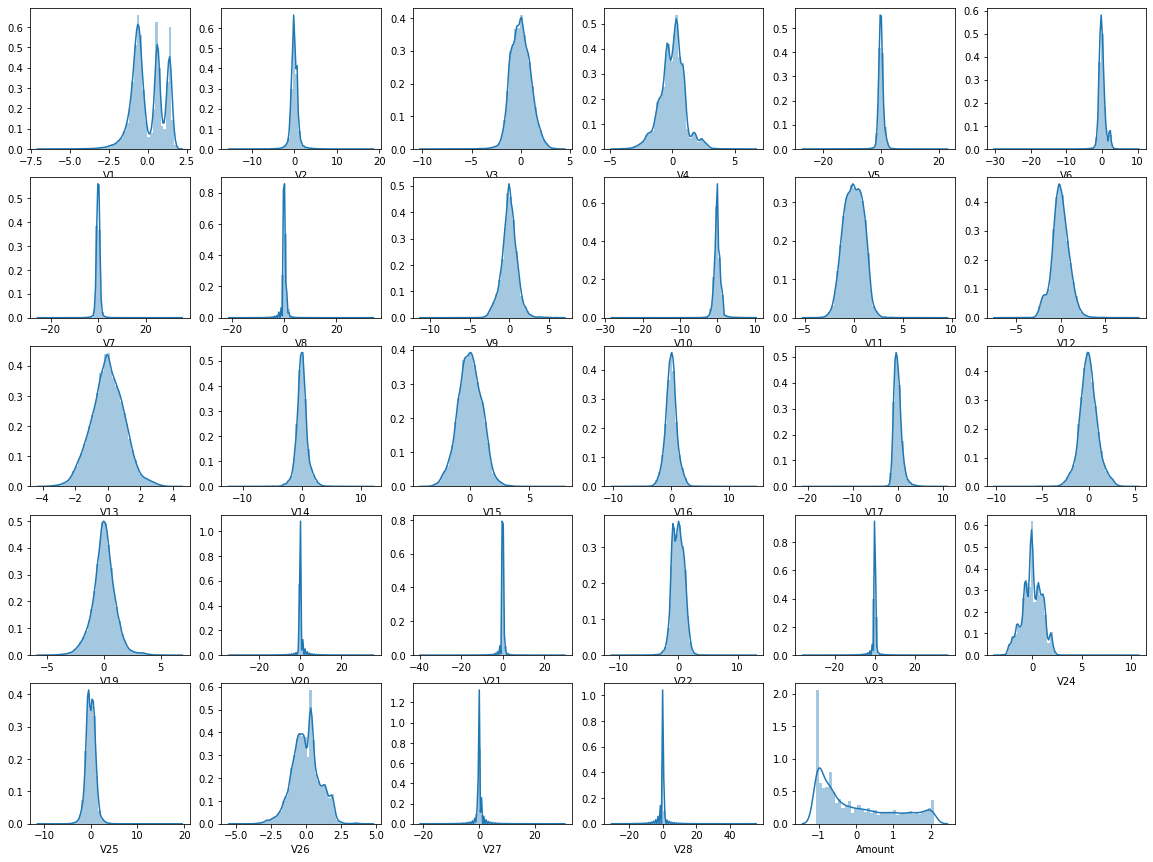

In [41]:
# plot the histogram of a variable from the dataset again to see the result 

var = X_test.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_test[col])

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

## Model Building - Imbalanced data

We are going to build models on below mentioned algorithms and we will compare for the best model. We are not building models on SVM, RandomForest and KNN as these algorithms are computationaly expensive and need more computational resources specially for the SVM and KNN. KNN algorithms calculate distance between each data points and then this calculation iterates for all the data points to calcualte the nearest neighbour. This process is computationally very expensive when we have very large data set. We do not have these resource available so we are skipping these models.
    - Logistic Regression
    - Decision Tree
    - XGBoost

#### Metric selection on imbalance data
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

In [42]:
# Function to create decision tree using graphviz

from io import StringIO
from sklearn.metrics import roc_auc_score

def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Fradulent', "Non-Fradulent"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

# Print classification report for different models for train and test data
def evaluate_model(y_train_pred, y_test_pred):
    print("-"*25+"Train"+"-"*25)
    print(classification_report(y_train, y_train_pred))
    print("-"*25+"Test"+"-"*25)
    print(classification_report(y_test, y_test_pred))
    
def get_results_df(method, y_test_pred, score):
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred, pos_label=1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    results = pd.DataFrame({'Method':[method],
                      'AUC': score,
                      'Threshold': [threshold],
                      'Test Accuracy': [round(accuracy_score(y_test, y_test_pred),2)],
                      'Test Precision': [round(precision_score(y_test, y_test_pred),2)],
                      'Test Recall': [round(recall_score(y_test, y_test_pred),2)],
                      'Test F1': [round(f1_score(y_test, y_test_pred),2)]})
    return results

# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [43]:
# Class imbalance
y_train.value_counts()/y_train.shape

0    0.998271
1    0.001729
Name: Class, dtype: float64

### Logistic Regression

In [44]:
# Create LogisticRegression instance
lr = LogisticRegression()

# fitting the model
lr.fit(X_train, y_train)

# Predict target variable
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Print Classification Report
evaluate_model(y_train_pred_lr, y_test_pred_lr)

-------------------------Train-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.66      0.76       394

    accuracy                           1.00    227845
   macro avg       0.95      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845

-------------------------Test-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.67      0.74        98

    accuracy                           1.00     56962
   macro avg       0.91      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



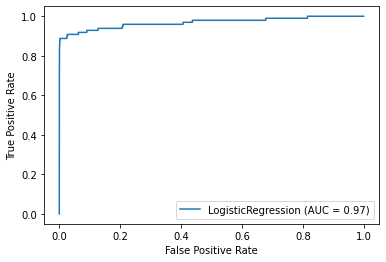

In [45]:
# Plot ROC Curve

plot_roc_curve(lr, X_test, y_test, drop_intermediate=False)

#### Hyper-Parameter Tunning

In [46]:
# hyperparameter space
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create RandomizedSearchCV object
lr = RandomizedSearchCV(estimator = LogisticRegression(), cv=folds, 
                        param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
lr.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.4s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000]},
                   scoring='roc_auc', verbose=1)

In [47]:
# cross validation results
lr_cv_results = pd.DataFrame(lr.cv_results_)
lr_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.663860,0.514128,0.073249,0.023537,0.01,{'C': 0.01},0.986474,0.984258,0.977578,0.985473,0.981119,0.982980,0.003246,1
1,3.680414,0.601796,0.069127,0.013537,0.1,{'C': 0.1},0.988046,0.985851,0.973677,0.983685,0.980879,0.982427,0.004977,2
2,3.952225,0.677064,0.066571,0.024231,1,{'C': 1},0.988082,0.985723,0.972116,0.982939,0.980777,0.981927,0.005494,3
3,4.085789,0.699944,0.060117,0.011645,10,{'C': 10},0.988090,0.985692,0.971907,0.982846,0.980768,0.981861,0.005563,4
4,3.944812,0.666715,0.068383,0.008638,100,{'C': 100},0.988089,0.985692,0.971883,0.982834,0.980767,0.981853,0.005571,5
5,3.456443,0.357940,0.052855,0.004347,1000,{'C': 1000},0.988088,0.985692,0.971883,0.982831,0.980767,0.981852,0.005571,6


In [48]:
# find the best estimator model
lr_best = lr.best_estimator_
lr_best

LogisticRegression(C=0.01)

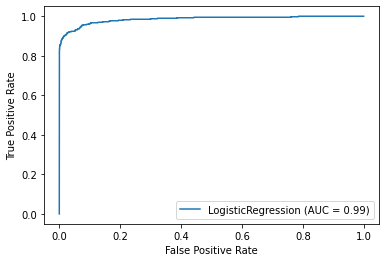

In [49]:
# Plot ROC Curve on train data
plot_roc_curve(lr_best, X_train, y_train, drop_intermediate=False);

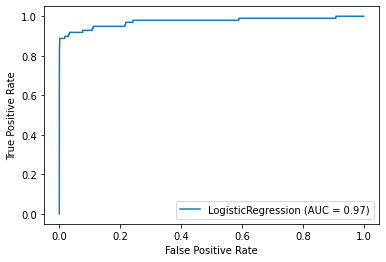

In [50]:
# Plot ROC Curve on test data
plot_roc_curve(lr_best, X_test, y_test, drop_intermediate=False)

In [51]:
# Predict target variable
y_train_pred_lr = lr_best.predict(X_train)
y_test_pred_lr = lr_best.predict(X_test)

# Print Classification Report or printing the evaluation result
evaluate_model(y_train_pred_lr, y_test_pred_lr)

-------------------------Train-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.91      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

-------------------------Test-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [52]:
# Predicted probability
y_test_pred_proba_lr =  lr_best.predict_proba(X_test)[:,1]

lr_auc = round(roc_auc_score(y_test, y_test_pred_proba_lr),2)
print(lr_auc)

0.97


In [53]:
# Add to final results df for finalizing best model
results = get_results_df('Logistic Regression - Imbalanced Data', y_test_pred_lr, lr_auc)
results

,Method,AUC,Threshold,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression - Imbalanced Data,0.97,1,1.0,0.84,0.63,0.72


### Decision Tree

In [54]:
# Building decision tree with default hyperparameters
dt = DecisionTreeClassifier(max_depth=3)

# fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

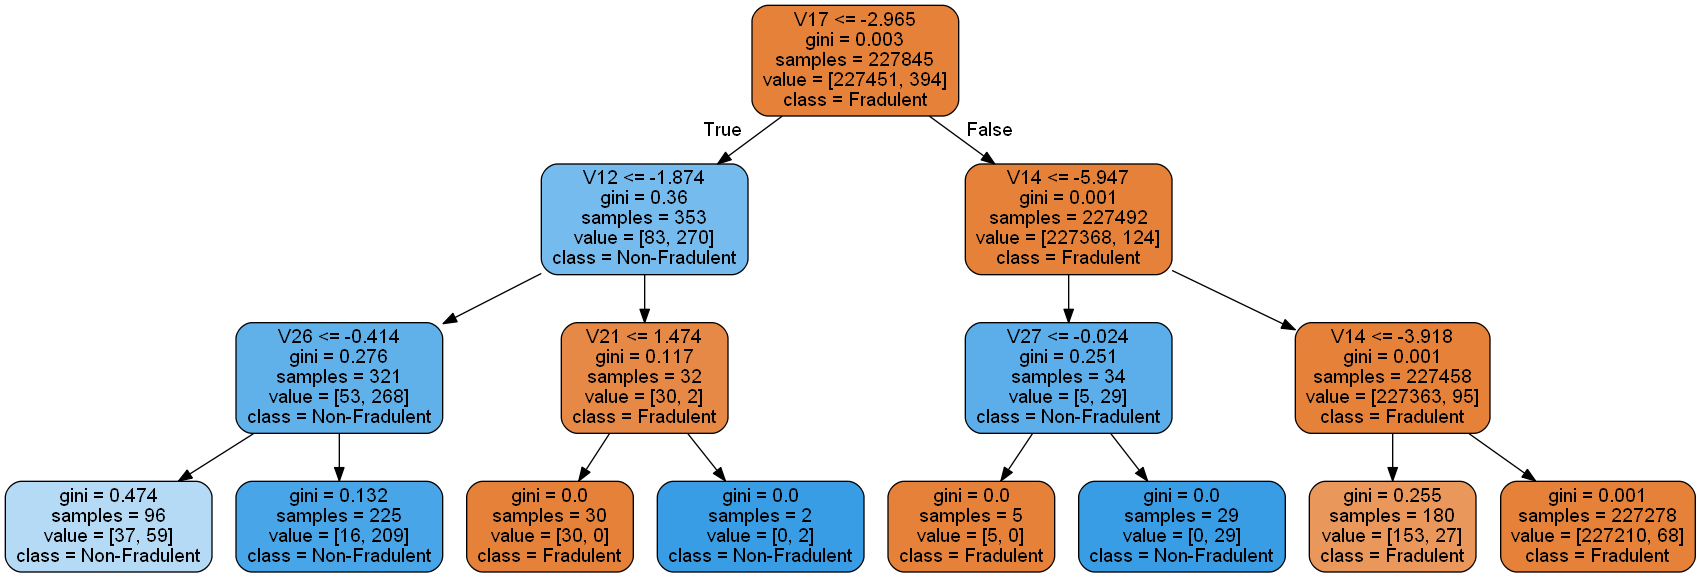

In [55]:
# Plot Decision Tree
gph = get_dt_graph(dt)
Image(gph.create_png())

In [56]:
# Predict target variable
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

# Print Classification Report
evaluate_model(y_train_pred_dt, y_test_pred_dt)

-------------------------Train-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.76      0.80       394

    accuracy                           1.00    227845
   macro avg       0.92      0.88      0.90    227845
weighted avg       1.00      1.00      1.00    227845

-------------------------Test-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.77      0.77        98

    accuracy                           1.00     56962
   macro avg       0.89      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962



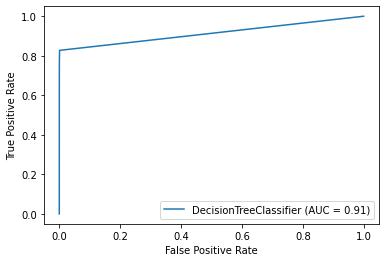

In [57]:
# Plot ROC Curve on train data
plot_roc_curve(dt, X_train, y_train, drop_intermediate=False);

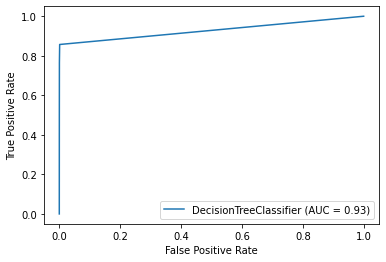

In [58]:
# Plot ROC Curve on test data
plot_roc_curve(dt, X_test, y_test, drop_intermediate=False);

#### Hyperparameter Tuning - Decision Tree

In [59]:
# hyperparameter space
params = {"min_samples_split": [10, 20, 30, 40, 50],
          "max_depth": [3, 4, 5],
          "min_samples_leaf": [10, 20, 30, 40, 50],
          "criterion": ['gini', 'entropy']}

# Create DecisionTreeClassifier instance
dt = DecisionTreeClassifier(random_state=50, class_weight='balanced')

# Create RandomizedSearchCV instance with DecisionTreeClassifier and hyperparameters
cv_dt = RandomizedSearchCV(estimator=dt, param_distributions = params, cv=5, n_jobs=-1, scoring = 'roc_auc')

# fitting the model
cv_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=50),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50]},
                   scoring='roc_auc')

In [60]:
# find the best estimator model
dt_best = cv_dt.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_leaf=40, min_samples_split=50,
                       random_state=50)

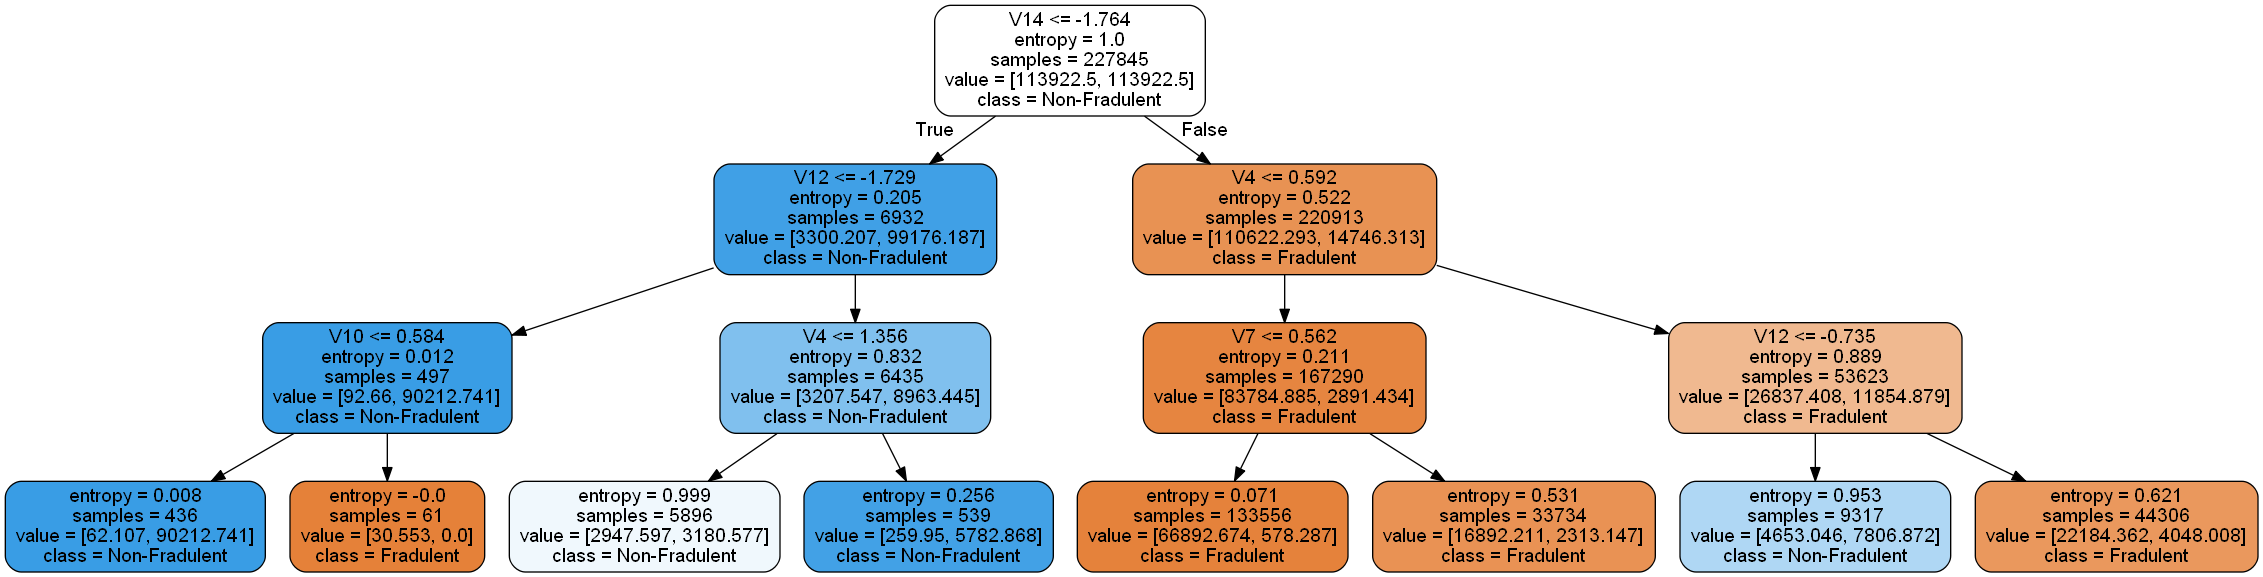

In [61]:
# Plot Decision Tree
gph = get_dt_graph(dt_best)
Image(gph.create_png())

In [62]:
# Predict target variable
y_train_pred_dt = dt_best.predict(X_train)
y_test_pred_dt = dt_best.predict(X_test)

# Print Classification Report
evaluate_model(y_train_pred_dt, y_test_pred_dt)

-------------------------Train-------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    227451
           1       0.02      0.94      0.04       394

    accuracy                           0.93    227845
   macro avg       0.51      0.93      0.50    227845
weighted avg       1.00      0.93      0.96    227845

-------------------------Test-------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.93      0.96     56962



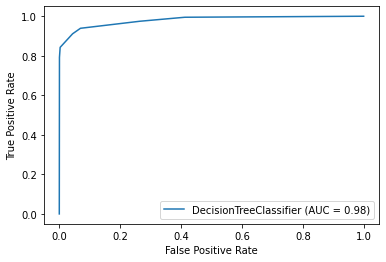

In [63]:
# Plot ROC Curve on train data
plot_roc_curve(dt_best, X_train, y_train, drop_intermediate=False);

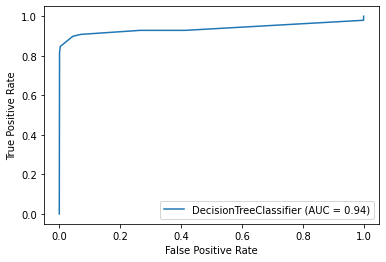

In [64]:
# Plot ROC Curve on test data
plot_roc_curve(dt_best, X_test, y_test, drop_intermediate=False)

In [65]:
# Predicted probability
y_test_pred_proba_dt =  dt_best.predict_proba(X_test)[:,1]

dt_auc = round(roc_auc_score(y_test, y_test_pred_proba_dt),2)
print(dt_auc)

0.94


### Decision Tree Model Result

In [66]:
# Add to final results df for finalizing best model
tempresults = get_results_df('Decision Tree - Imbalanced Data', y_test_pred_dt, dt_auc)
results = pd.concat([results, tempresults])
results

,Method,AUC,Threshold,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression - Imbalanced Data,0.97,1,1.00,0.84,0.63,0.72
0,Decision Tree - Imbalanced Data,0.94,1,0.93,0.02,0.91,0.04


### Random Forest - Imbalanced Data

In [67]:
# Create RandomForestClassifier instance
rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

# fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

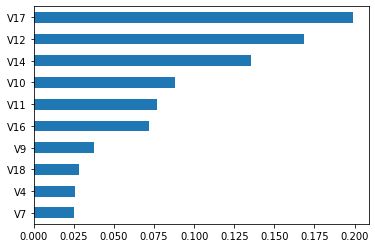

In [68]:
# Extracting top 10 important features with weights
importance = rf.feature_importances_
weights = pd.Series(importance,
                 index=X.columns.values)

# Plot horizontal bar graphs of weights sorted in decreasing order (top 10)
weights.sort_values()[-10:].plot(kind = 'barh');

In [69]:
# Predict target variable
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Print Classification Report
evaluate_model(y_train_pred_rf, y_test_pred_rf)

-------------------------Train-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      0.78      0.87       394

    accuracy                           1.00    227845
   macro avg       0.99      0.89      0.94    227845
weighted avg       1.00      1.00      1.00    227845

-------------------------Test-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



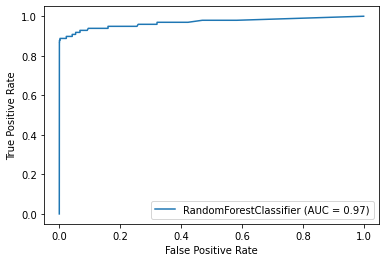

In [70]:
# Plot ROC Curve
plot_roc_curve(rf, X_test, y_test, drop_intermediate=False);

#### Hyperparameter Tuning - Random Forest

In [71]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter space
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [50,60,70,80,90,100,None],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'max_features': ['auto','sqrt'],
    'n_estimators': [10, 30, 50, 100, 200]
}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create RandomizedSearchCV object
cv_rf = RandomizedSearchCV(estimator=forest, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fitting the model
cv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [50, 60, 70, 80, 90, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             200],
                                        'n_estimators': [10, 30, 50, 100, 200]},
                   scoring='roc_auc', verbose=1)

In [72]:
# find the best estimator model
rf_best = cv_rf.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, min_samples_leaf=200, n_estimators=50,
                       n_jobs=-1)

In [73]:
# Predict target variable
y_train_pred_rf = rf_best.predict(X_train)
y_test_pred_rf = rf_best.predict(X_test)

# Print Classification Report
evaluate_model(y_train_pred_rf, y_test_pred_rf)

-------------------------Train-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.46      0.98      0.62       394

    accuracy                           1.00    227845
   macro avg       0.73      0.99      0.81    227845
weighted avg       1.00      1.00      1.00    227845

-------------------------Test-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.89      0.54        98

    accuracy                           1.00     56962
   macro avg       0.69      0.94      0.77     56962
weighted avg       1.00      1.00      1.00     56962



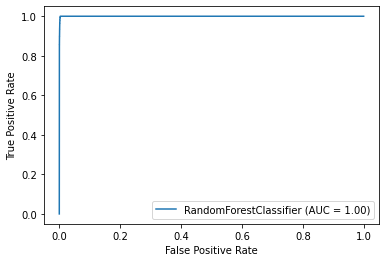

In [74]:
# Plot ROC Curve on train data
plot_roc_curve(rf_best, X_train, y_train, drop_intermediate=False);

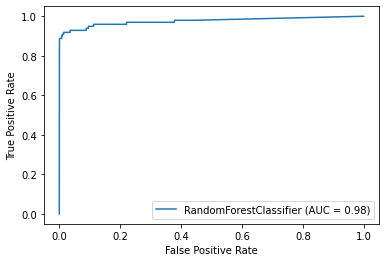

In [75]:
# Plot ROC Curve on test data
plot_roc_curve(rf_best, X_test, y_test, drop_intermediate=False);

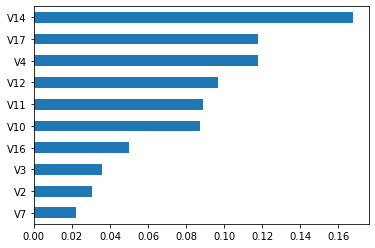

In [76]:
# Extracting top 10 important features with weights
importance = rf_best.feature_importances_
weights = pd.Series(importance,
                 index=X.columns.values)

# Plot horizontal bar graphs of weights sorted in decreasing order (top 10)
weights.sort_values()[-10:].plot(kind = 'barh');

In [77]:
# Predicted probability
y_test_pred_proba_rf =  rf_best.predict_proba(X_test)[:,1]

rf_auc = round(roc_auc_score(y_test, y_test_pred_proba_rf),2)
print(rf_auc)

0.98


In [78]:
# Add to final results df for finalizing best model
tempresults = get_results_df('Random Forest - Imbalanced Data', y_test_pred_rf, rf_auc)
results = pd.concat([results, tempresults])
results

,Method,AUC,Threshold,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression - Imbalanced Data,0.97,1,1.00,0.84,0.63,0.72
0,Decision Tree - Imbalanced Data,0.94,1,0.93,0.02,0.91,0.04
0,Random Forest - Imbalanced Data,0.98,1,1.00,0.38,0.89,0.54


### XGBoost - Imbalanced

In [79]:
# Create RandomForestClassifier instance
xgb = XGBClassifier(max_depth=2, n_estimators=200)

# fitting the model
xgb.fit(X_train, y_train)

[12:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

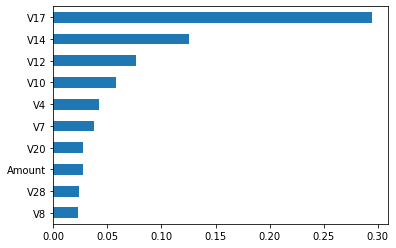

In [80]:
# Extracting top 10 important features with weights
importance = xgb.feature_importances_
weights = pd.Series(importance,
                 index=X.columns.values)

# Plot horizontal bar graphs of weights sorted in decreasing order (top 10)
weights.sort_values()[-10:].plot(kind = 'barh');

In [81]:
# Predict target variable
y_train_pred_xgb = rf.predict(X_train)
y_test_pred_xgb = rf.predict(X_test)

# Print Classification Report
evaluate_model(y_train_pred_xgb, y_test_pred_xgb)

-------------------------Train-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      0.78      0.87       394

    accuracy                           1.00    227845
   macro avg       0.99      0.89      0.94    227845
weighted avg       1.00      1.00      1.00    227845

-------------------------Test-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



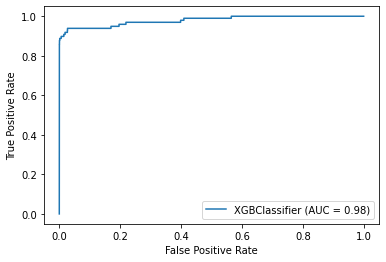

In [82]:
# Plot ROC Curve
plot_roc_curve(xgb, X_test, y_test, drop_intermediate=False);

#### Hyperparameter Tuning - XGBoost

In [83]:
# creating a KFold object 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up RandomizedSearchCV()
cv_xgb = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
cv_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 13.2min finished


[12:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=2,
                                           min_child_weight=None, miss...n,
                                           monotone_constraints=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_stat

In [84]:
# cv results
cv_results_xgb = pd.DataFrame(cv_xgb.cv_results_)
cv_results_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.889455,0.219383,0.075675,0.010200,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.992779,0.981593,0.958304,0.981466,0.984854,0.979799,0.011507,4,0.999394,0.999295,0.999706,0.999649,0.998894,0.999388,0.000291
1,27.146890,0.219137,0.070470,0.015444,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",0.996361,0.977385,0.965673,0.984706,0.989268,0.982678,0.010507,1,0.999747,0.999711,0.999720,0.999885,0.999809,0.999774,0.000065
2,32.794802,0.210566,0.067920,0.010960,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.993979,0.977151,0.968413,0.983969,0.988239,0.982350,0.008875,2,0.999604,0.999771,0.999814,0.999788,0.999753,0.999746,0.000074
3,18.685962,0.112853,0.064490,0.005431,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.986102,0.969884,0.941192,0.958781,0.977978,0.966787,0.015666,6,0.999789,0.999938,0.999998,0.999977,0.999913,0.999923,0.000073
4,26.683932,0.248124,0.077386,0.006579,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",0.994556,0.987166,0.955550,0.972893,0.988662,0.979765,0.014045,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,32.053137,0.951401,0.078988,0.003404,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",0.997919,0.973595,0.967523,0.977587,0.985432,0.980411,0.010510,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [85]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", cv_xgb.best_score_)
print(cv_xgb.best_estimator_)

Best roc auc score :  0.9826783309402961
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [86]:
# find the best estimator model
xgb_best = cv_xgb.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
# Predict target variable
y_train_pred_xgb = xgb_best.predict(X_train)
y_test_pred_xgb = xgb_best.predict(X_test)

# Print Classification Report
evaluate_model(y_train_pred_xgb, y_test_pred_xgb)

-------------------------Train-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      0.86      0.92       394

    accuracy                           1.00    227845
   macro avg       0.99      0.93      0.96    227845
weighted avg       1.00      1.00      1.00    227845

-------------------------Test-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



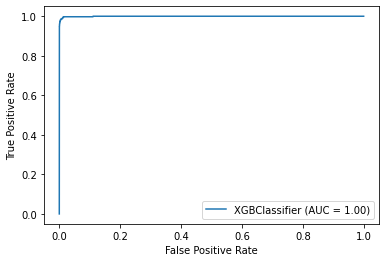

In [88]:
# Plot ROC Curve on train data
plot_roc_curve(xgb_best, X_train, y_train, drop_intermediate=False);

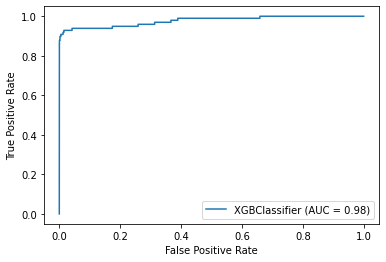

In [89]:
# Plot ROC Curve on test data
plot_roc_curve(xgb_best, X_test, y_test, drop_intermediate=False);

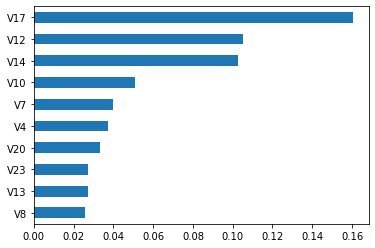

In [90]:
# Extracting top 10 important features with weights
importance = xgb_best.feature_importances_
weights = pd.Series(importance,
                 index=X.columns.values)

# Plot horizontal bar graphs of weights sorted in decreasing order (top 10)
weights.sort_values()[-10:].plot(kind = 'barh');

In [91]:
# Predicted probability
y_test_pred_proba_xgb =  xgb_best.predict_proba(X_test)[:,1]

xgb_auc = round(roc_auc_score(y_test, y_test_pred_proba_xgb),2)
print(xgb_auc)

0.98


In [92]:
# Add to final results df for finalizing best model
tempresults = get_results_df('XGBoost - Imbalanced Data', y_test_pred_xgb, xgb_auc)
results = pd.concat([results, tempresults])
results

,Method,AUC,Threshold,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression - Imbalanced Data,0.97,1,1.00,0.84,0.63,0.72
0,Decision Tree - Imbalanced Data,0.94,1,0.93,0.02,0.91,0.04
0,Random Forest - Imbalanced Data,0.98,1,1.00,0.38,0.89,0.54
0,XGBoost - Imbalanced Data,0.98,1,1.00,0.93,0.82,0.87


**XGBoost model is giving good performance on the unbalanced data among these 4 models. ROC-AUC score on the train data is 100% and on test data 98%.**

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 12
3rd Top var = 14


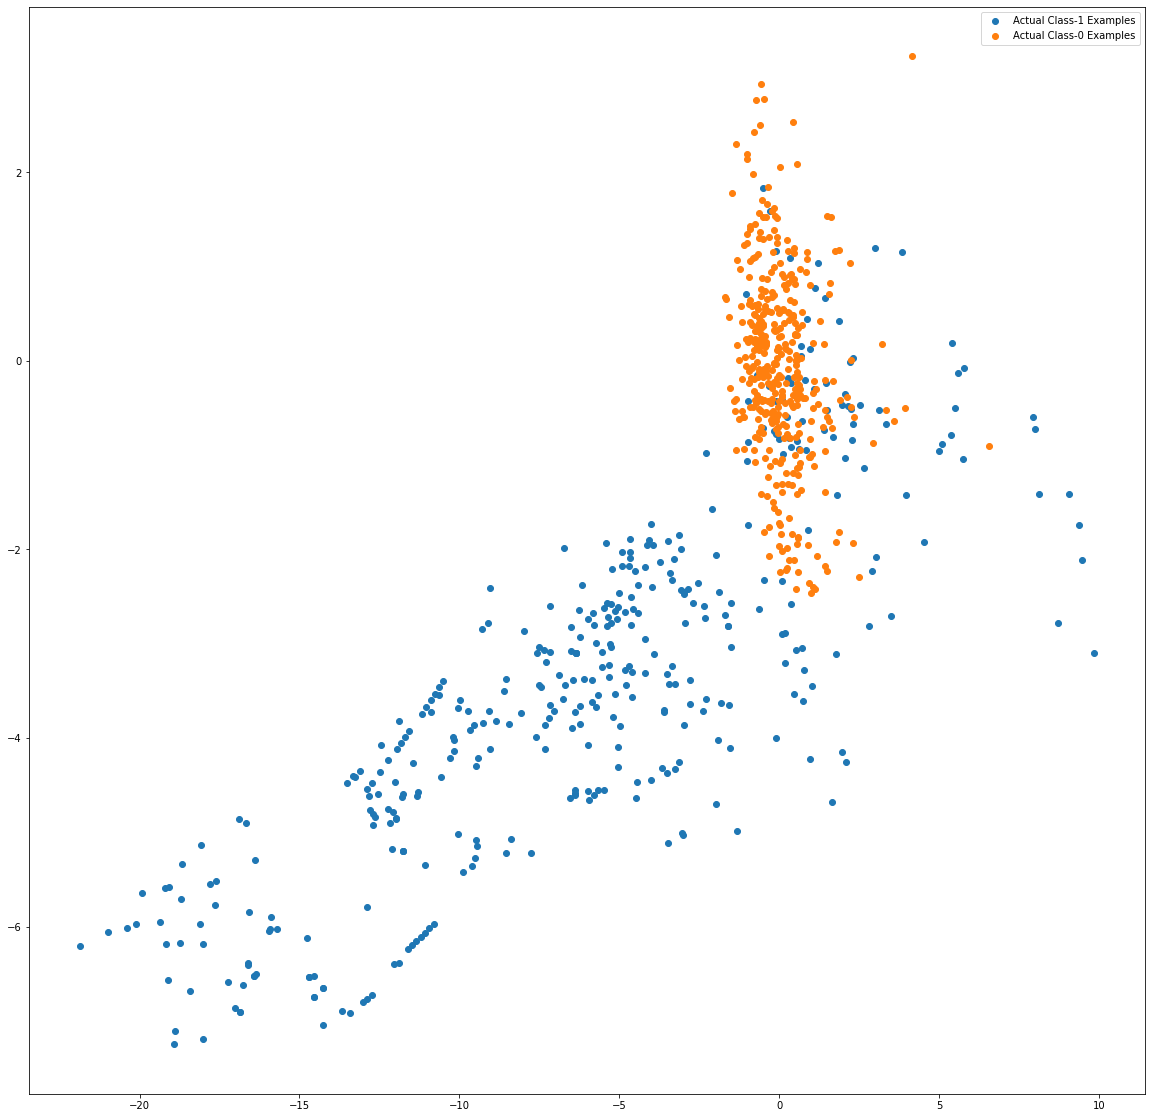

In [93]:
clf = xgb_best

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

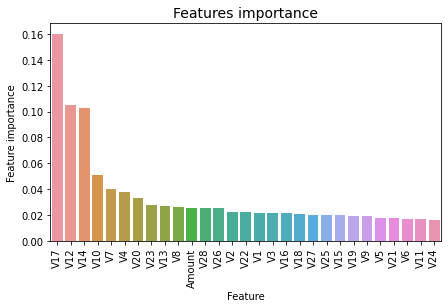

In [94]:
target = 'Class'
col = X_train.columns

tmp = pd.DataFrame({'Feature': col, 'Feature importance': xgb_best.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [95]:
from imblearn import over_sampling 
from imblearn.over_sampling import RandomOverSampler
#- import the packages

# define oversampling strategy
oversample = RandomOverSampler()

# fit and apply the transform
X_over, y_over = oversample.fit_sample(X_train, y_train)

from collections import Counter

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))

# new class distribution 
print('New class distribution:-',Counter(y_over))

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
#print the evaluation result by choosing a evaluation metric
#print the optimum value of hyperparameters

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 1. Logistic Regression with Random Oversampling

In [96]:
# Create LogisticRegression instance
lr_over = LogisticRegression()

# fitting the model
lr_over.fit(X_over, y_over)

# Predict target variable
y_train_pred = lr_over.predict(X_train)
y_test_pred = lr_over.predict(X_test)

# Print Classification Report
evaluate_model(y_train_pred, y_test_pred)

-------------------------Train-------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.06      0.93      0.11       394

    accuracy                           0.97    227845
   macro avg       0.53      0.95      0.55    227845
weighted avg       1.00      0.97      0.98    227845

-------------------------Test-------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



#### Hyperparameter Tuning - Logistic Regression

In [97]:
# Creating KFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv_lr_over = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv_lr_over.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv_lr_over.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_lr_over.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min finished


Best ROC AUC score:  0.9884239337867557
Best hyperparameters:  {'C': 100}


In [98]:
# cross validation results
cv_results_lr_over = pd.DataFrame(model_cv_lr_over.cv_results_)
cv_results_lr_over

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.982237,0.094373,0.038384,0.007784,0.01,{'C': 0.01},0.988003,0.988253,0.988840,0.988270,0.988055,0.988284,0.000297,6,0.988351,0.988295,0.988185,0.988310,0.988371,0.988302,0.000065
1,1.968706,0.087221,0.040234,0.002814,0.1,{'C': 0.1},0.988128,0.988368,0.988964,0.988407,0.988180,0.988410,0.000297,5,0.988478,0.988419,0.988308,0.988427,0.988487,0.988424,0.000064
2,2.006616,0.057968,0.040478,0.002274,1,{'C': 1},0.988141,0.988380,0.988976,0.988421,0.988194,0.988423,0.000297,4,0.988492,0.988433,0.988321,0.988440,0.988499,0.988437,0.000064
3,1.936998,0.076385,0.041372,0.003496,10,{'C': 10},0.988143,0.988381,0.988976,0.988424,0.988195,0.988424,0.000296,3,0.988493,0.988434,0.988322,0.988441,0.988500,0.988438,0.000064
4,1.912925,0.065840,0.036083,0.001713,100,{'C': 100},0.988143,0.988381,0.988977,0.988424,0.988195,0.988424,0.000296,1,0.988493,0.988434,0.988322,0.988442,0.988500,0.988438,0.000064
5,1.921982,0.067604,0.036036,0.003294,1000,{'C': 1000},0.988143,0.988381,0.988976,0.988424,0.988195,0.988424,0.000296,2,0.988493,0.988434,0.988322,0.988442,0.988501,0.988438,0.000064


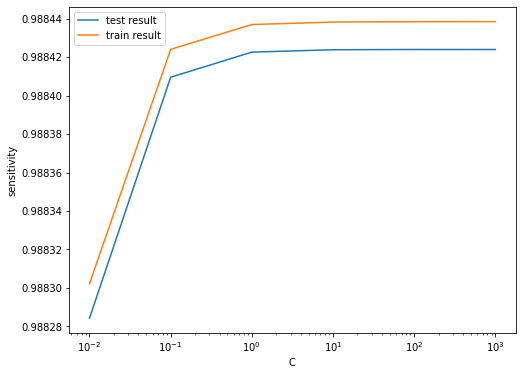

In [99]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results_lr_over['param_C'], cv_results_lr_over['mean_test_score'])
plt.plot(cv_results_lr_over['param_C'], cv_results_lr_over['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [100]:
model_cv_lr_over.best_params_

{'C': 100}

In [101]:
# find the best estimator model

lr_best_over = model_cv_lr_over.best_estimator_
lr_best_over

LogisticRegression(C=100)

In [102]:
# Fitting the model with train data
logreg_over_model = lr_best_over.fit(X_over, y_over)

#### Evaluating the model on train data

In [103]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [104]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [105]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.98%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



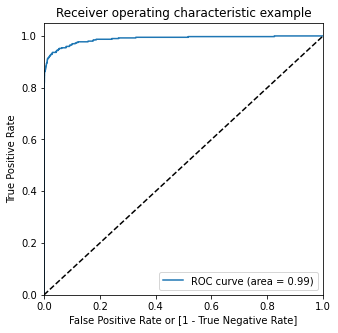

In [106]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [107]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.32%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



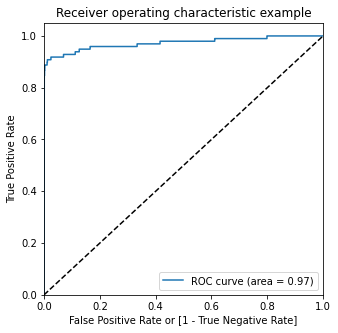

In [108]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [109]:
# Predicted probability
y_test_pred_proba_lr =  logreg_over_model.predict_proba(X_test)[:,1]

lr_auc = round(roc_auc_score(y_test, y_test_pred_proba_lr),2)
print(lr_auc)

0.97


In [110]:
# Add to final results df for finalizing best model
tempresults = get_results_df('Logistic Regression- Random Over Sampling', y_test_pred, lr_auc)
results = pd.concat([results, tempresults])
results

,Method,AUC,Threshold,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression - Imbalanced Data,0.97,1,1.00,0.84,0.63,0.72
0,Decision Tree - Imbalanced Data,0.94,1,0.93,0.02,0.91,0.04
0,Random Forest - Imbalanced Data,0.98,1,1.00,0.38,0.89,0.54
0,XGBoost - Imbalanced Data,0.98,1,1.00,0.93,0.82,0.87
0,Logistic Regression- Random Over Sampling,0.97,1,0.97,0.05,0.92,0.10


### 2. Decision Tree with Random Oversampling

In [111]:
# Building decision tree with default hyperparameters
dtree = DecisionTreeClassifier(max_depth=3)

# fitting the model
dtree.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=3)

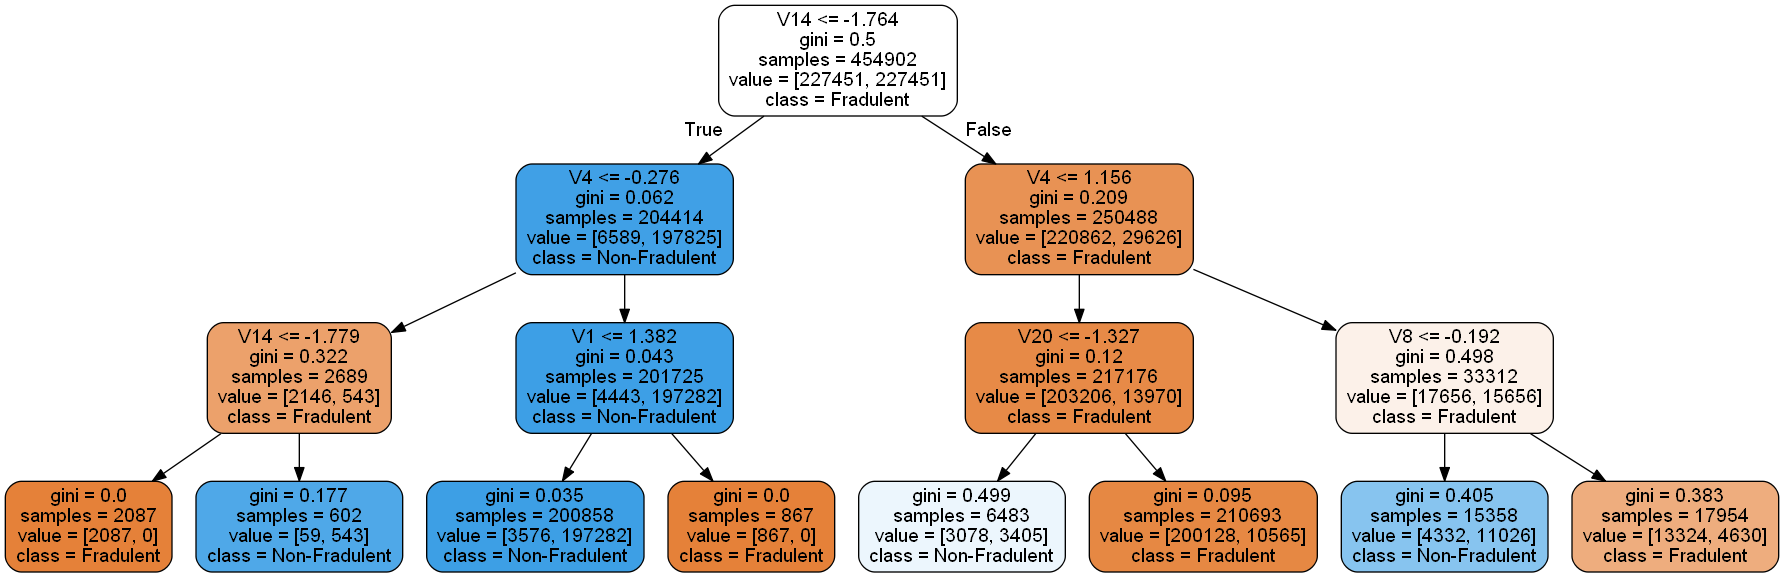

In [112]:
# Plot Decision Tree
gph = get_dt_graph(dtree)
Image(gph.create_png())

#### Hypertunning 

In [113]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

model_cv_1 = RandomizedSearchCV(estimator = dtree, 
                           param_distributions = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
model_cv_1.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   46.3s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [114]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", model_cv_1.best_score_)
print(model_cv_1.best_estimator_)

Best roc auc score :  0.9993346498851191
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [115]:
# find the best estimator model
dt_over_model = model_cv_1.best_estimator_
dt_over_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

#### Model evatuation on train data

In [116]:
# Predictions on the train set
y_train_pred_over_dtree = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred_over_dtree)

F1 Score: 99.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



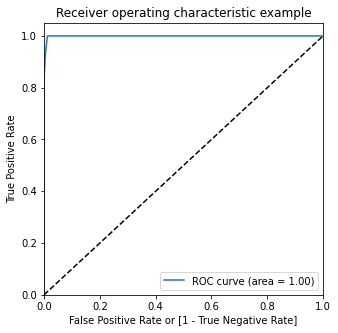

In [117]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [118]:
# Evaluating model on the test data
y_test_pred_dt_over = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred_dt_over)

F1 Score: 17.53%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.83      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962



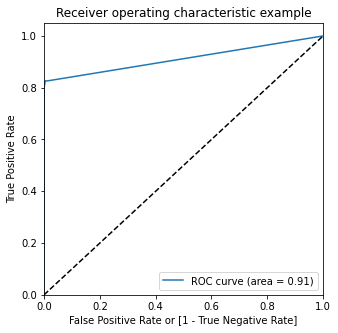

In [119]:
# Predicted probability
y_test_pred_proba_dt_over = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_dt_over)

In [120]:
# Predicted probability
y_test_pred_prob_dt_over =  dt_over_model.predict_proba(X_test)[:,1]

dt_auc_over = round(roc_auc_score(y_test, y_test_pred_prob_dt_over),2)
print(dt_auc_over)

0.91


In [121]:
# Add to final results df for finalizing best model
results = get_results_df('Decision Tree - Random Over Sampling', y_test_pred_dt_over, dt_auc_over)
results

,Method,AUC,Threshold,Test Accuracy,Test Precision,Test Recall,Test F1
0,Decision Tree - Random Over Sampling,0.91,1,0.99,0.1,0.83,0.18


### 3. XGBoost with Random Oversampling

In [122]:
#Initializing XGB and creating model
xgb_over = XGBClassifier()

In [123]:
# Fitting the model on Train data
xgb_over.fit(X_over, y_over)

[12:53:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
# Predict target variable
y_train_pred_xgb_over = xgb_over.predict(X_over)
y_test_pred_xgb_over = xgb_over.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix

# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred_xgb))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred_xgb))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_test_pred_xgb))
print('ROC AUC : ', roc_auc_score(y_test, y_test_pred_xgb))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56858     6]
 [   18    80]]
Logistic Regression Accuracy:  0.9995786664794073
ROC AUC :  0.9081105078497353


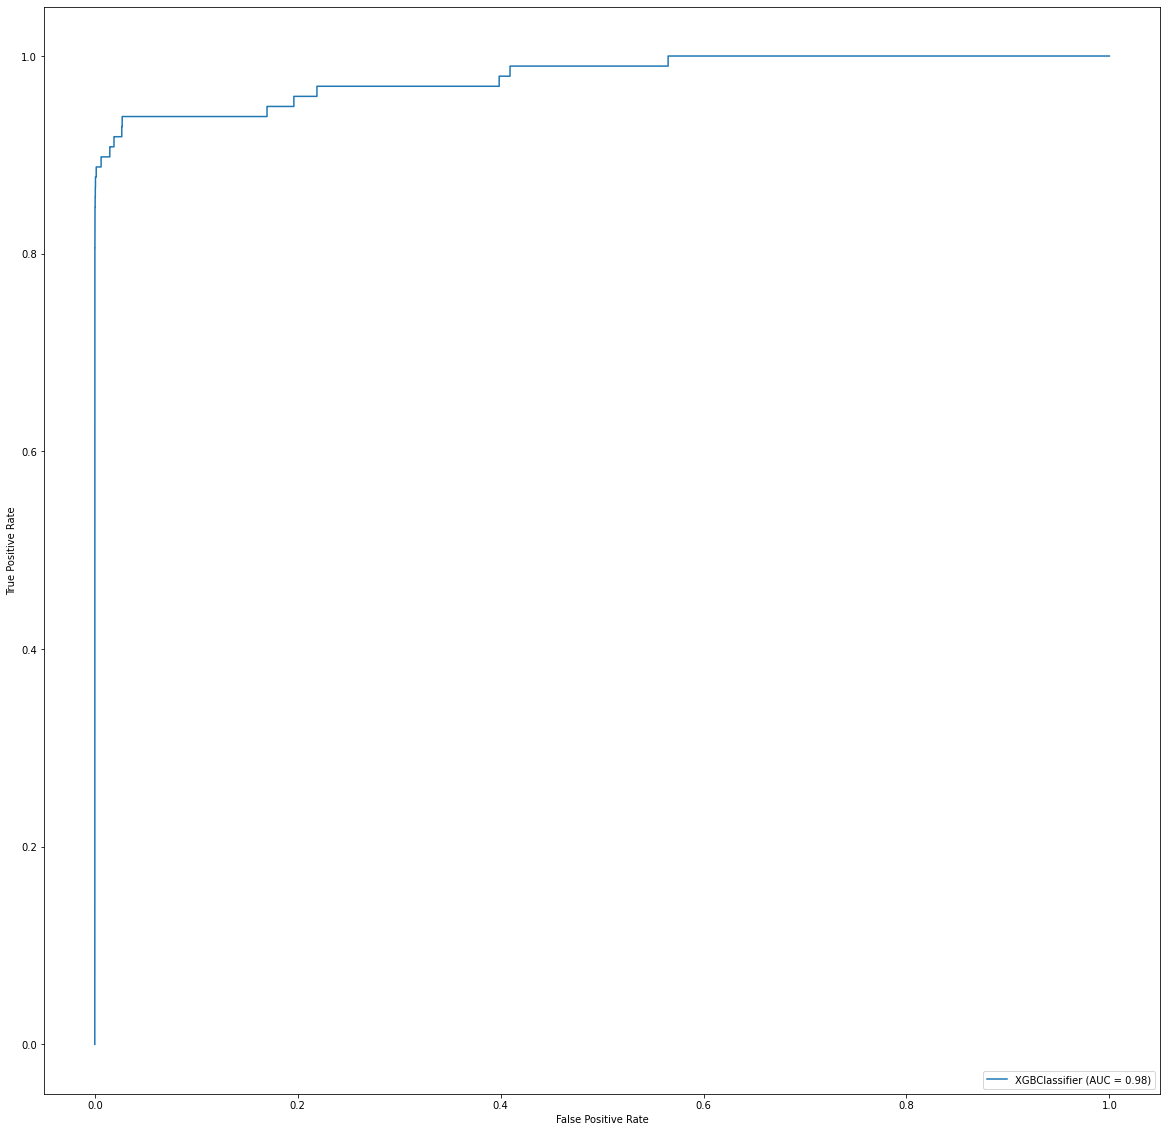

In [126]:
# Plot ROC Curve
plot_roc_curve(xgb, X_test, y_test, drop_intermediate=False);

#### Hypertunning

In [127]:
# creating a KFold object 
folds = StratifiedKFold(n_splits=5)

# specify range of hyperparameters

param_grid =  {'learning_rate': [0.2, 0.6],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


# specify model
xgb_model = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[12:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 105.1min finished


[14:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     mis...constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
          

In [128]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,57.563421,0.469959,0.156057,0.023703,0.2,3,0.6,"{'learning_rate': 0.2, 'max_depth': 3, 'subsam...",0.999996,0.999970,0.999976,0.999995,0.999981,0.999983,0.000010,16,0.999991,0.999994,0.999995,0.999991,0.999994,0.999993,0.000002
1,61.906595,0.325108,0.150108,0.017636,0.2,3,0.8,"{'learning_rate': 0.2, 'max_depth': 3, 'subsam...",0.999994,0.999971,0.999965,0.999992,0.999986,0.999982,0.000012,17,0.999991,0.999992,0.999988,0.999993,0.999995,0.999992,0.000002
2,61.013483,0.246209,0.185621,0.062464,0.2,3,1,"{'learning_rate': 0.2, 'max_depth': 3, 'subsam...",0.999995,0.999955,0.999957,0.999991,0.999973,0.999974,0.000017,18,0.999989,0.999994,0.999995,0.999988,0.999991,0.999991,0.000003
3,73.548672,1.333923,0.168998,0.018172,0.2,4,0.6,"{'learning_rate': 0.2, 'max_depth': 4, 'subsam...",0.999999,1.000000,0.999982,1.000000,0.999991,0.999994,0.000007,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,78.697834,0.309650,0.167234,0.020371,0.2,4,0.8,"{'learning_rate': 0.2, 'max_depth': 4, 'subsam...",1.000000,1.000000,0.999985,1.000000,0.999993,0.999995,0.000006,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,79.847739,0.304809,0.156595,0.011857,0.2,4,1,"{'learning_rate': 0.2, 'max_depth': 4, 'subsam...",1.000000,0.999997,0.999979,1.000000,0.999995,0.999994,0.000008,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,84.508009,0.318082,0.177659,0.005089,0.2,5,0.6,"{'learning_rate': 0.2, 'max_depth': 5, 'subsam...",1.000000,1.000000,0.999989,1.000000,0.999993,0.999996,0.000004,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,91.606454,0.596800,0.197522,0.016701,0.2,5,0.8,"{'learning_rate': 0.2, 'max_depth': 5, 'subsam...",1.000000,0.999999,0.999991,1.000000,0.999996,0.999997,0.000003,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,95.046391,0.915993,0.185514,0.009102,0.2,5,1,"{'learning_rate': 0.2, 'max_depth': 5, 'subsam...",1.000000,1.000000,0.999987,1.000000,0.999996,0.999997,0.000005,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,55.435963,0.483011,0.152686,0.009953,0.6,3,0.6,"{'learning_rate': 0.6, 'max_depth': 3, 'subsam...",0.999996,0.999993,0.999982,1.000000,0.999989,0.999992,0.000006,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [129]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999972614488915
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [130]:
print(model_cv.best_score_)
print(model_cv.best_params_)
print(model_cv.best_index_)

0.9999972614488915
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.8}
7


#### XGBoost with optimal hyperparameter

In [131]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

[14:41:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Model evatuation on train data

In [132]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



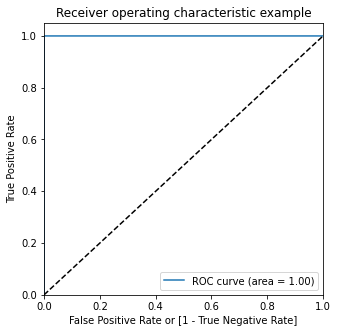

In [133]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Model evaluation on the test set

In [134]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 86.6%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



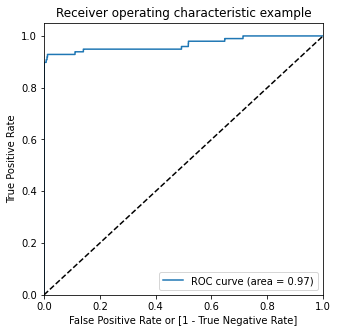

In [135]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [136]:
# Add to final results df for finalizing best model
results = get_results_df('Logistic Regression - Imbalanced Data', y_test_pred_lr, lr_auc)
results

,Method,AUC,Threshold,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression - Imbalanced Data,0.97,1,1.0,0.84,0.63,0.72


### Random Forest - Random Over Sampled Balanced Data

In [137]:
# Create RandomForestClassifier instance
rf_over = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

# fitting the model
rf.fit(X_over, y_over)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

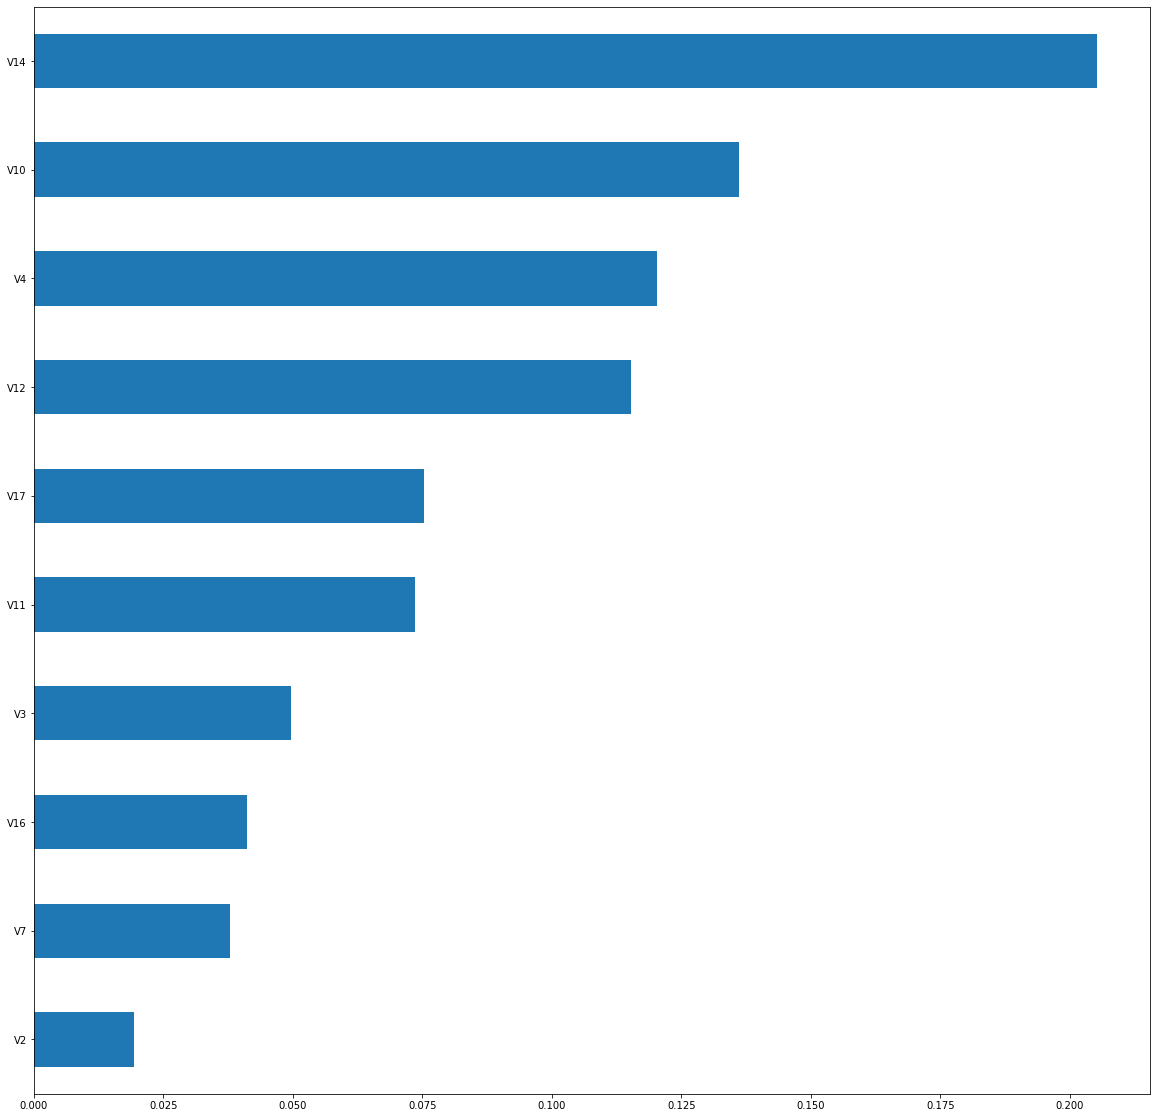

In [138]:
# Extracting top 10 important features with weights
importance = rf.feature_importances_
weights = pd.Series(importance,
                 index=X.columns.values)

# Plot horizontal bar graphs of weights sorted in decreasing order (top 10)
weights.sort_values()[-10:].plot(kind = 'barh');

In [140]:
# Predict target variable
y_train_pred = rf.predict(X_over)
y_test_pred = rf.predict(X_test)

# Print Classification Report
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_test_pred))
print('ROC AUC : ', roc_auc_score(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.89      0.39        98

    accuracy                           1.00     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56602   262]
 [   11    87]]
Logistic Regression Accuracy:  0.9952073312032583
ROC AUC :  0.9415738087581684


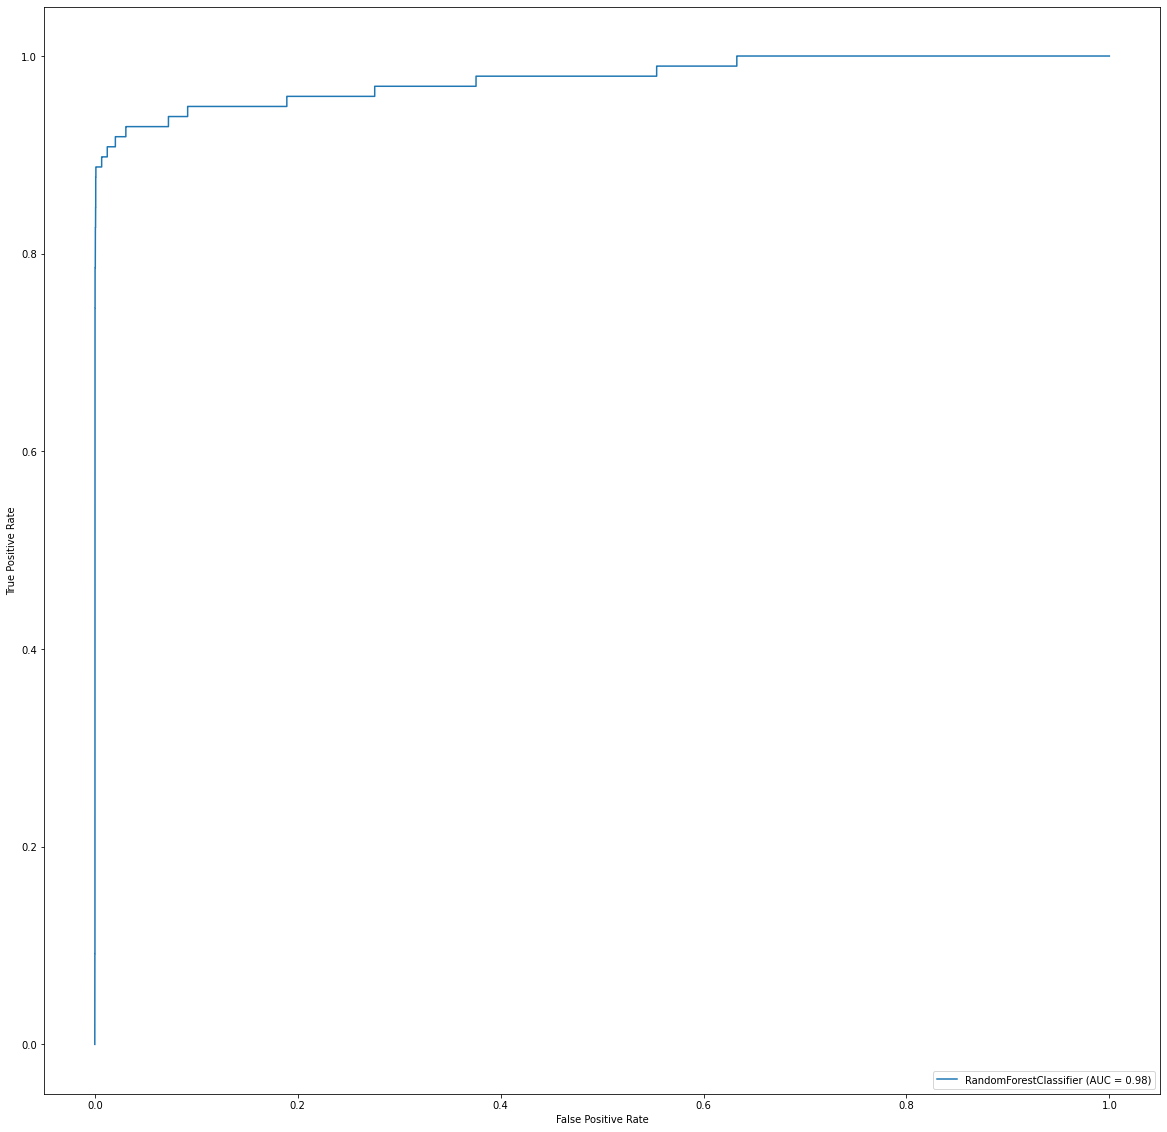

In [141]:
# Plot ROC Curve
plot_roc_curve(rf, X_test, y_test, drop_intermediate=False);

#### Hyperparameter Tuning - Random Forest Model

In [143]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter space
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [50,60,70,80,90,100,None],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'max_features': ['auto','sqrt'],
    'n_estimators': [10, 30, 50, 100, 200]
}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create RandomizedSearchCV object
rf = RandomizedSearchCV(estimator=forest, cv=folds, param_distributions=params, scoring='recall', n_jobs=-1, verbose=1)

# fitting the model
rf.fit(X_over, y_over)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 24.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [50, 60, 70, 80, 90, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             200],
                                        'n_estimators': [10, 30, 50, 100, 200]},
                   scoring='recall', verbose=1)

In [144]:
# find the best estimator model
rf_best = rf.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=100,
                       min_samples_leaf=100, n_estimators=200, n_jobs=-1)

In [145]:
# Predict target variable
y_train_pred = rf_best.predict(X_over)
y_test_pred = rf_best.predict(X_test)

# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_test_pred))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_test_pred))
print('ROC AUC : ', roc_auc_score(y_test, y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.89      0.70        98

    accuracy                           1.00     56962
   macro avg       0.79      0.94      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56801    63]
 [   11    87]]
Logistic Regression Accuracy:  0.9987008883115059
ROC AUC :  0.9433235977283428


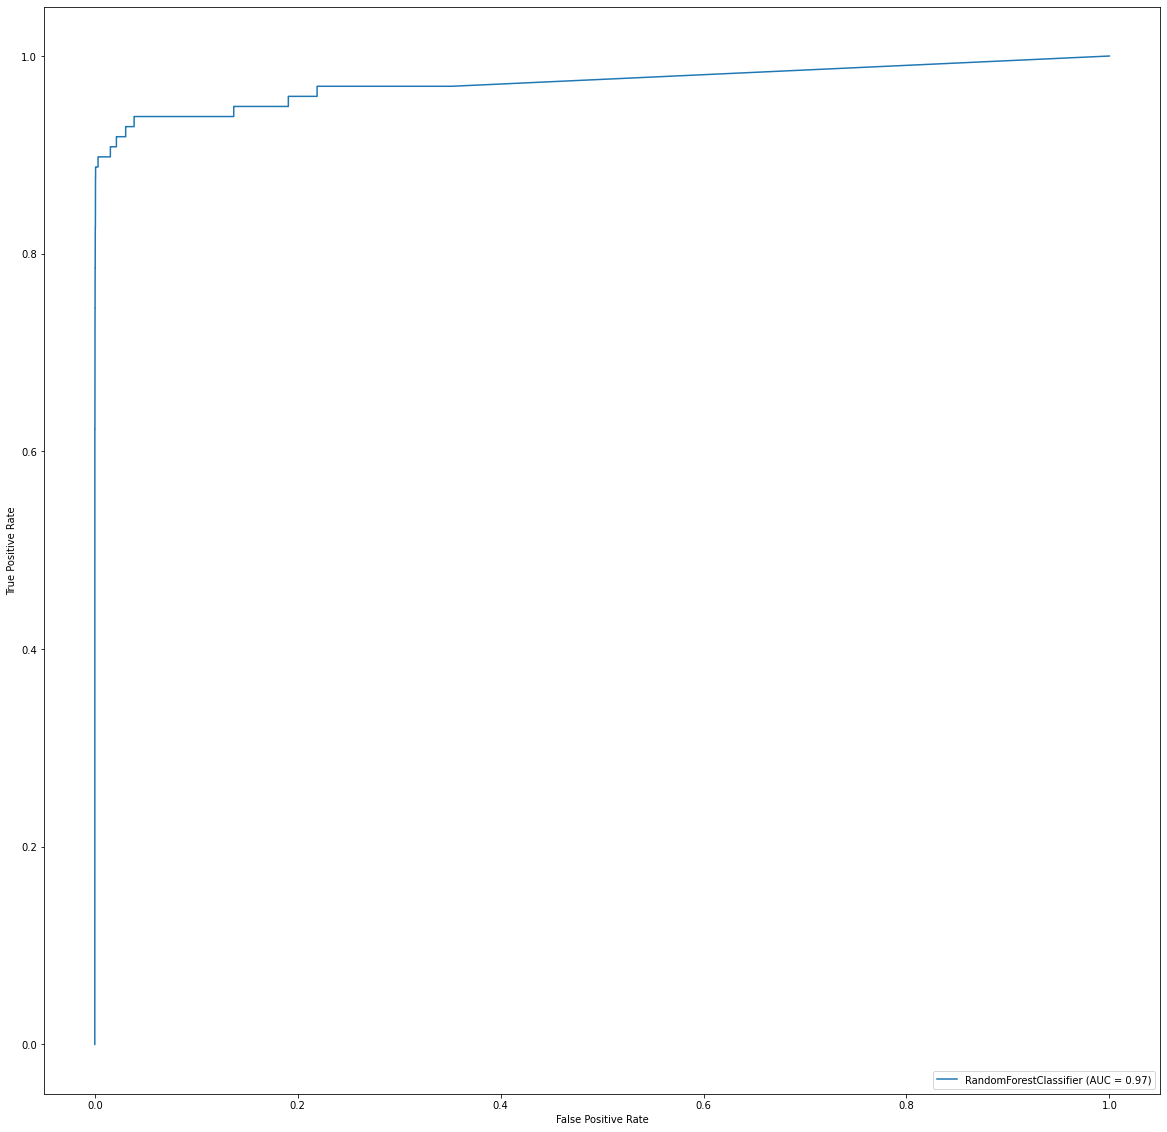

In [146]:
# Plot ROC Curve
plot_roc_curve(rf_best, X_test, y_test, drop_intermediate=False);

In [153]:
# Predicted probability
y_test_pred_prob_roc_over =  rf_best.predict_proba(X_test)[:,1]

rf_over_auc = round(roc_auc_score(y_test, y_test_pred_prob_roc_over),2)
print(rf_over_auc)

0.97


In [155]:
# Add to final results df for finalizing best model
tempresults = get_results_df('Random Forest - Random Over Sampled Balanced Data', y_test_pred, rf_over_auc)
results = pd.concat([results, tempresults])
results

,Method,AUC,Threshold,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression - Imbalanced Data,0.97,1,1.0,0.84,0.63,0.72
0,Random Forest - Random Over Sampled Balanced Data,0.97,1,1.0,0.58,0.89,0.70


## SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE 

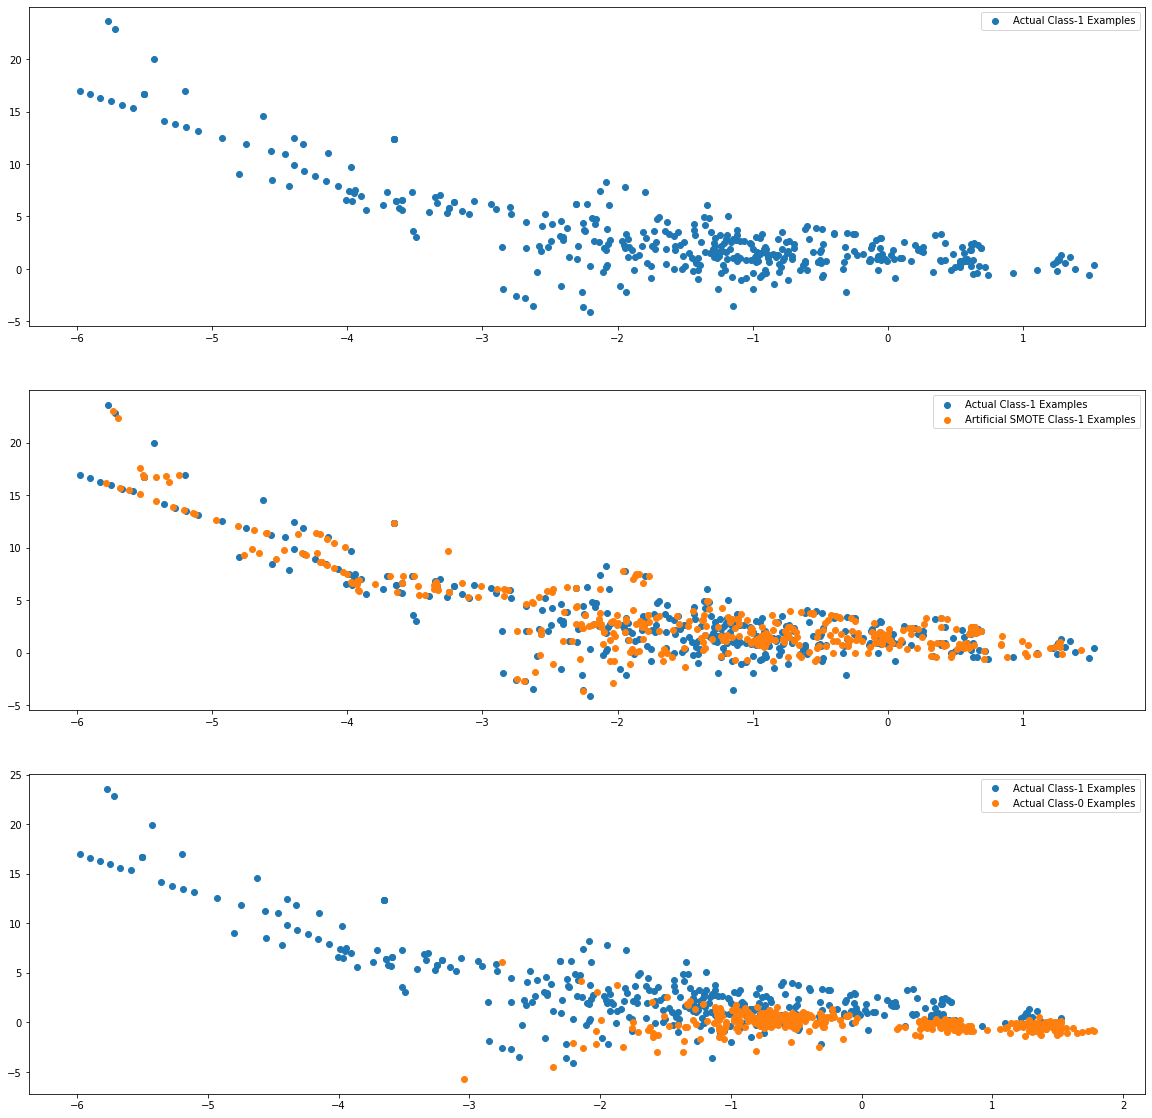

In [159]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0].values, X_train_smote_1.iloc[:X_train_1.shape[0], 1].values,
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on SMOTE

### 1. Logistic Regression on balanced data with SMOTE

In [160]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   59.5s finished


Best ROC AUC score:  0.9904411138246239
Best hyperparameters:  {'C': 1000}


In [161]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.783779,0.055530,0.039222,0.009214,0.01,{'C': 0.01},0.990239,0.990122,0.990773,0.990088,0.990398,0.990324,0.000249,6,0.990325,0.990361,0.990224,0.990432,0.990336,0.990336,0.000067
1,1.710694,0.113135,0.038273,0.004072,0.1,{'C': 0.1},0.990327,0.990240,0.990874,0.990195,0.990507,0.990429,0.000247,5,0.990431,0.990463,0.990331,0.990539,0.990439,0.990440,0.000067
2,1.708551,0.129522,0.033092,0.002363,1,{'C': 1},0.990336,0.990253,0.990885,0.990207,0.990519,0.990440,0.000247,4,0.990442,0.990474,0.990342,0.990550,0.990449,0.990452,0.000067
3,1.723531,0.116074,0.043021,0.005941,10,{'C': 10},0.990337,0.990254,0.990886,0.990208,0.990520,0.990441,0.000247,3,0.990443,0.990475,0.990344,0.990551,0.990451,0.990453,0.000067
4,1.828304,0.103496,0.041604,0.006897,100,{'C': 100},0.990337,0.990254,0.990886,0.990208,0.990520,0.990441,0.000247,2,0.990443,0.990475,0.990344,0.990551,0.990451,0.990453,0.000067
5,1.801133,0.105051,0.039958,0.006275,1000,{'C': 1000},0.990337,0.990255,0.990886,0.990208,0.990520,0.990441,0.000247,1,0.990443,0.990476,0.990344,0.990551,0.990451,0.990453,0.000067


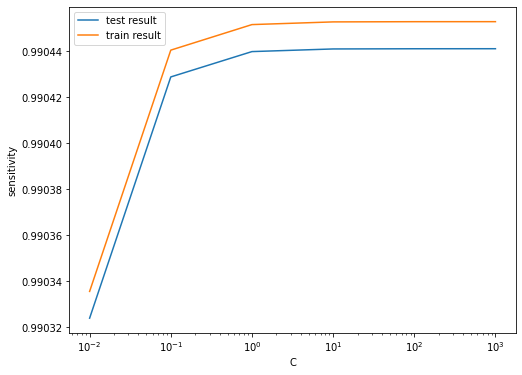

In [162]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [163]:
# Printing best params
model_cv.best_params_

{'C': 1000}

In [164]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

#### Evaluating the model on train data

In [165]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.9%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



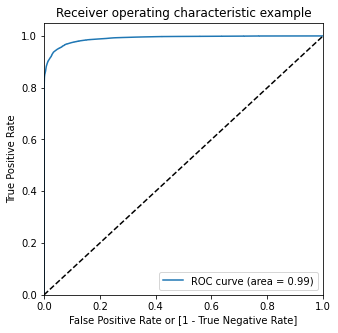

In [166]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### Evaluating on test data

In [167]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.7%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



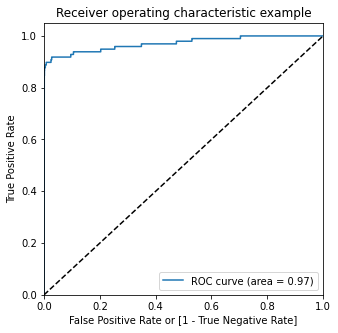

In [168]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

#### Model Summary
- Train set
    - ROC score : %
    - F1 score: %
- Test set
    - ROC score : %
    - F1 score: %

### 2. Decision Tree on balanced data with SMOTE

In [169]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [170]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9981152223240105
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [171]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [172]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Evaluating the model on train data

In [173]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.88%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



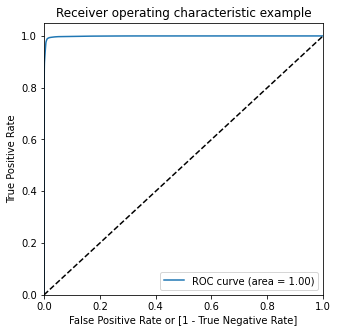

In [174]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [175]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 17.79%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.88      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.93      0.59     56962
weighted avg       1.00      0.99      0.99     56962



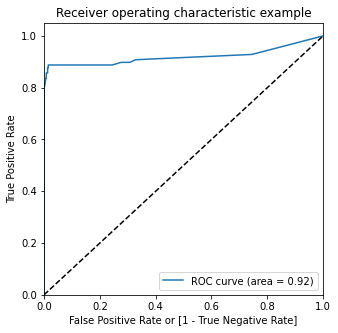

In [176]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

#### Model Summary
- Train set
    - ROC score : %
    - F1 score: %
- Test set
    - ROC score : %
    - F1 score: %

### 3. XGBoost on balanced data with SMOTE

In [177]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 13.5min finished


[16:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [178]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.338337,1.599353,0.211344,0.020607,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999597,0.999495,0.999627,0.999573,0.000056,4,0.999599,0.999621,0.999629,0.999617,0.000013
1,44.965061,0.175766,0.225611,0.020016,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999584,0.999487,0.999582,0.999551,0.000045,5,0.999599,0.999615,0.999578,0.999598,0.000015
2,55.609228,0.229754,0.231159,0.026191,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999582,0.999473,0.999579,0.999544,0.000051,6,0.999597,0.999609,0.999582,0.999596,0.000011
3,31.955122,0.303532,0.210505,0.007190,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999950,0.999884,0.999938,0.999924,0.000029,3,0.999963,0.999958,0.999960,0.999960,0.000002
4,46.607838,0.403591,0.213357,0.009050,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999957,0.999895,0.999931,0.999928,0.000026,2,0.999966,0.999972,0.999965,0.999967,0.000003
5,56.652898,0.057786,0.208568,0.015472,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999964,0.999906,0.999944,0.999938,0.000024,1,0.999969,0.999976,0.999972,0.999972,0.000003


In [179]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999382262993101
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


#### Model with optimal hyperparameter

In [180]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [181]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

[16:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Evaluating the model on the train data

In [182]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



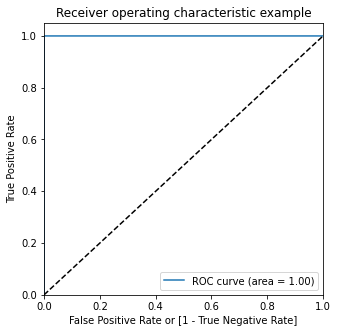

In [183]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on test data

In [184]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 77.93%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.85      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



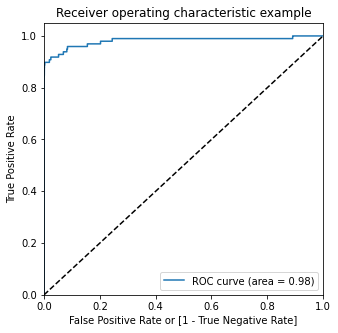

In [185]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : %
    - F1 score: %
- Test set
    - ROC score : %
    - F1 score: %

### ADASYN

### Print the class distribution after applying ADASYN

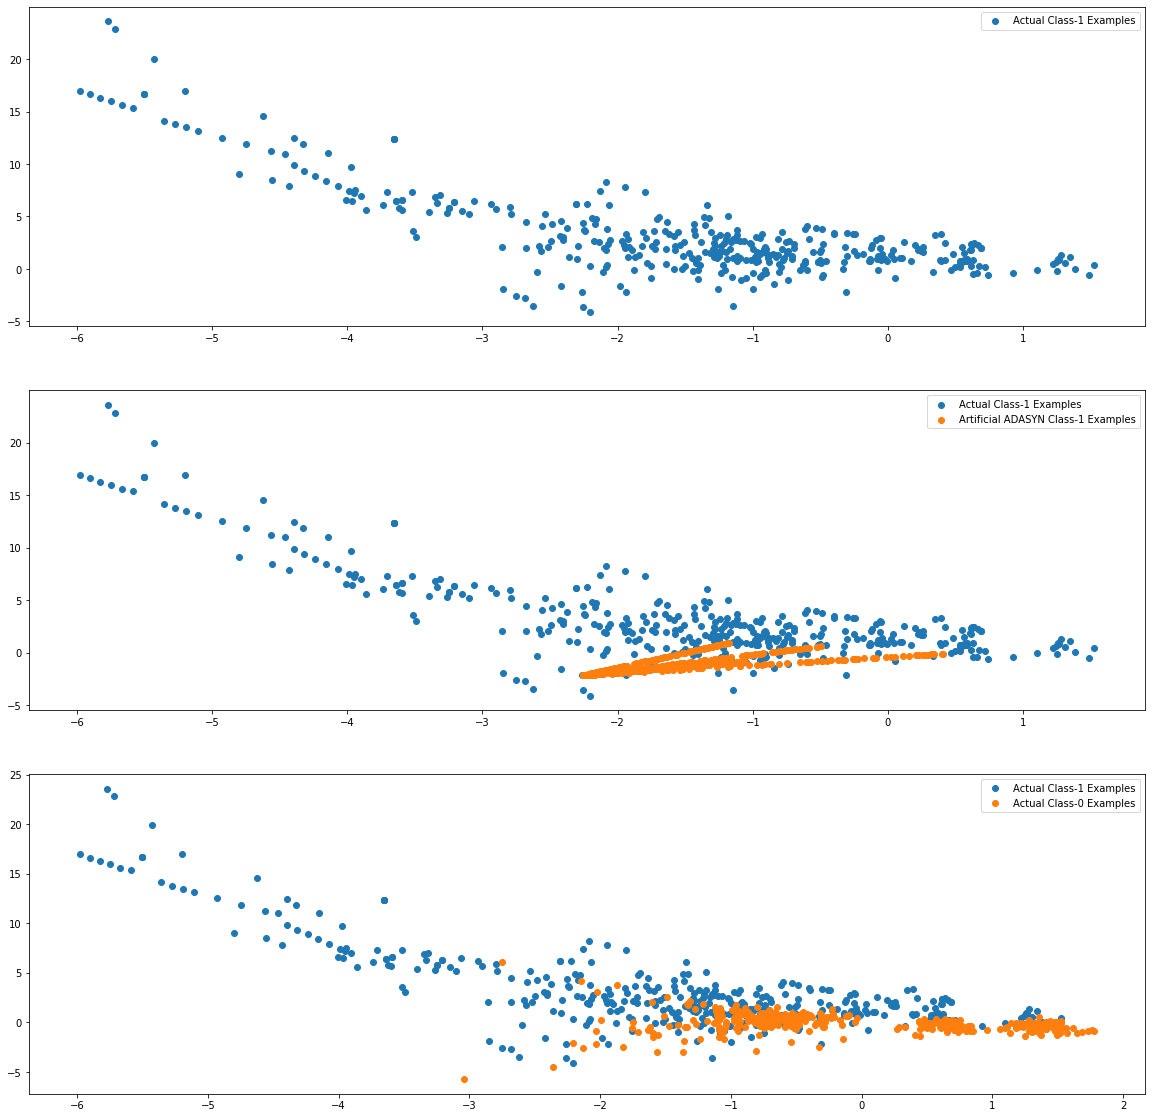

In [188]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0].values, X_train_adasyn_1.iloc[:X_train_1.shape[0], 1].values,
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced data with ADASYN

In [189]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   30.6s finished


Best ROC AUC score:  0.9674185386821469
Best hyperparameters:  {'C': 1000}


In [190]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.406853,0.041762,0.064277,0.002500,0.01,{'C': 0.01},0.966853,0.967309,0.967307,0.967156,0.000215,6,0.967198,0.967121,0.967267,0.967196,0.000060
1,1.457777,0.025521,0.070891,0.014487,0.1,{'C': 0.1},0.967079,0.967548,0.967560,0.967396,0.000224,5,0.967446,0.967360,0.967500,0.967436,0.000058
2,1.485842,0.056027,0.071270,0.013121,1,{'C': 1},0.967098,0.967569,0.967582,0.967416,0.000225,4,0.967468,0.967382,0.967520,0.967457,0.000057
3,1.574133,0.046370,0.062973,0.013324,10,{'C': 10},0.967099,0.967571,0.967584,0.967418,0.000226,3,0.967470,0.967384,0.967522,0.967459,0.000057
4,1.533353,0.013598,0.068770,0.010076,100,{'C': 100},0.967100,0.967572,0.967584,0.967419,0.000226,2,0.967470,0.967384,0.967522,0.967459,0.000057
5,1.498860,0.048687,0.067939,0.007202,1000,{'C': 1000},0.967100,0.967572,0.967584,0.967419,0.000226,1,0.967470,0.967384,0.967522,0.967459,0.000057


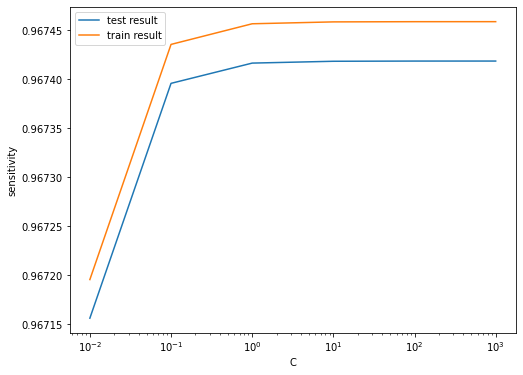

In [191]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [192]:
model_cv.best_params_

{'C': 1000}

In [193]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### Evaluating the model with train data

In [194]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 90.28%
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90    227451
           1       0.91      0.90      0.90    227458

    accuracy                           0.90    454909
   macro avg       0.90      0.90      0.90    454909
weighted avg       0.90      0.90      0.90    454909



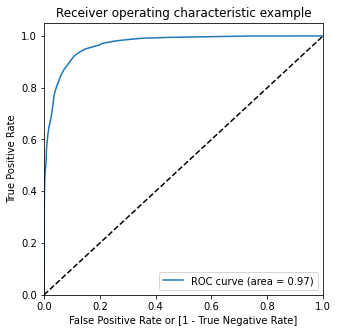

In [195]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating on test data

In [196]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.43%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



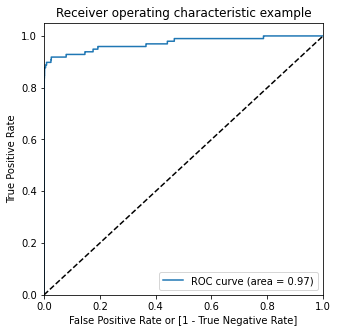

In [197]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : %
    - F1 score: %
- Test set
    - ROC score : %
    - F1 score: %

### 2. Decision Tree on balanced data with ADASYN

In [198]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [199]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.943028849736063
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Model with optimal hyperparameters

In [200]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Evaluating the model on train data

In [201]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 98.03%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    227451
           1       0.97      0.99      0.98    227458

    accuracy                           0.98    454909
   macro avg       0.98      0.98      0.98    454909
weighted avg       0.98      0.98      0.98    454909



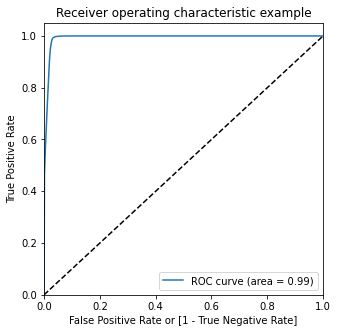

In [202]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [203]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 7.97%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.85      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.97      0.98     56962



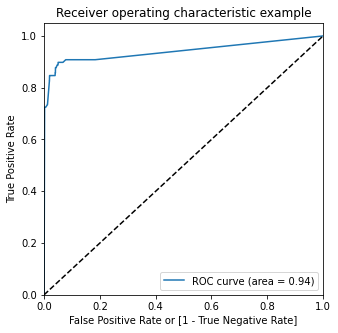

In [204]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : %
    - F1 score: %
- Test set
    - ROC score : %
    - F1 score: %

### 3. XGBoost on balanced data with ADASYN

In [205]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 13.6min finished


[17:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [206]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.832952,0.763878,0.232117,0.010736,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.991480,0.985927,0.973886,0.983764,0.007344,6,0.999194,0.999033,0.998808,0.999012,0.000158
1,45.252929,0.193051,0.198565,0.006876,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.990826,0.984843,0.978139,0.984603,0.005182,5,0.999201,0.999089,0.998989,0.999093,0.000087
2,55.939752,0.272663,0.213781,0.007934,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.990896,0.986245,0.977256,0.984799,0.005662,4,0.999144,0.998996,0.998779,0.998973,0.000150
3,31.663839,0.346970,0.231243,0.011696,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.996441,0.986032,0.984332,0.988935,0.005353,2,0.999914,0.999929,0.999878,0.999907,0.000021
4,46.781820,0.306187,0.226512,0.018816,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.996485,0.986247,0.983530,0.988754,0.005578,3,0.999937,0.999927,0.999892,0.999919,0.000019
5,57.047268,0.145272,0.223932,0.015409,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.997399,0.985096,0.989601,0.990699,0.005082,1,0.999934,0.999934,0.999911,0.999926,0.000011


In [207]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9906989912339336
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


#### Model with optimal hyperparameter

In [208]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [209]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[17:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Evaluating the model on the train data

In [210]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227458

    accuracy                           1.00    454909
   macro avg       1.00      1.00      1.00    454909
weighted avg       1.00      1.00      1.00    454909



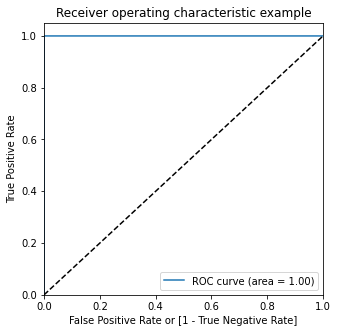

In [211]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on test data

In [212]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 74.67%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.66      0.86      0.75        98

    accuracy                           1.00     56962
   macro avg       0.83      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962



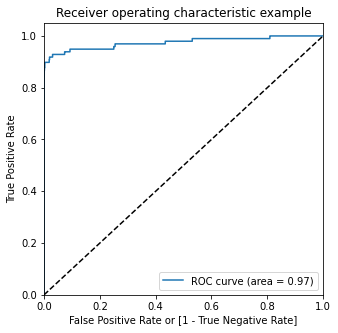

In [213]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 100%
- Test set
    - ROC score : 97%
    - F1 score: 77%

### Select the oversampling method which shows the best result on a model

We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, random forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the  dataset which is balanced with AdaSyn technique. We got ROC score 100% on train data and 99% on the test data and F1 score 100% on train data and 81% in the test data. 

Hence, we conclude that the `XGBoost model with Adasyn` is the best model.

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 7


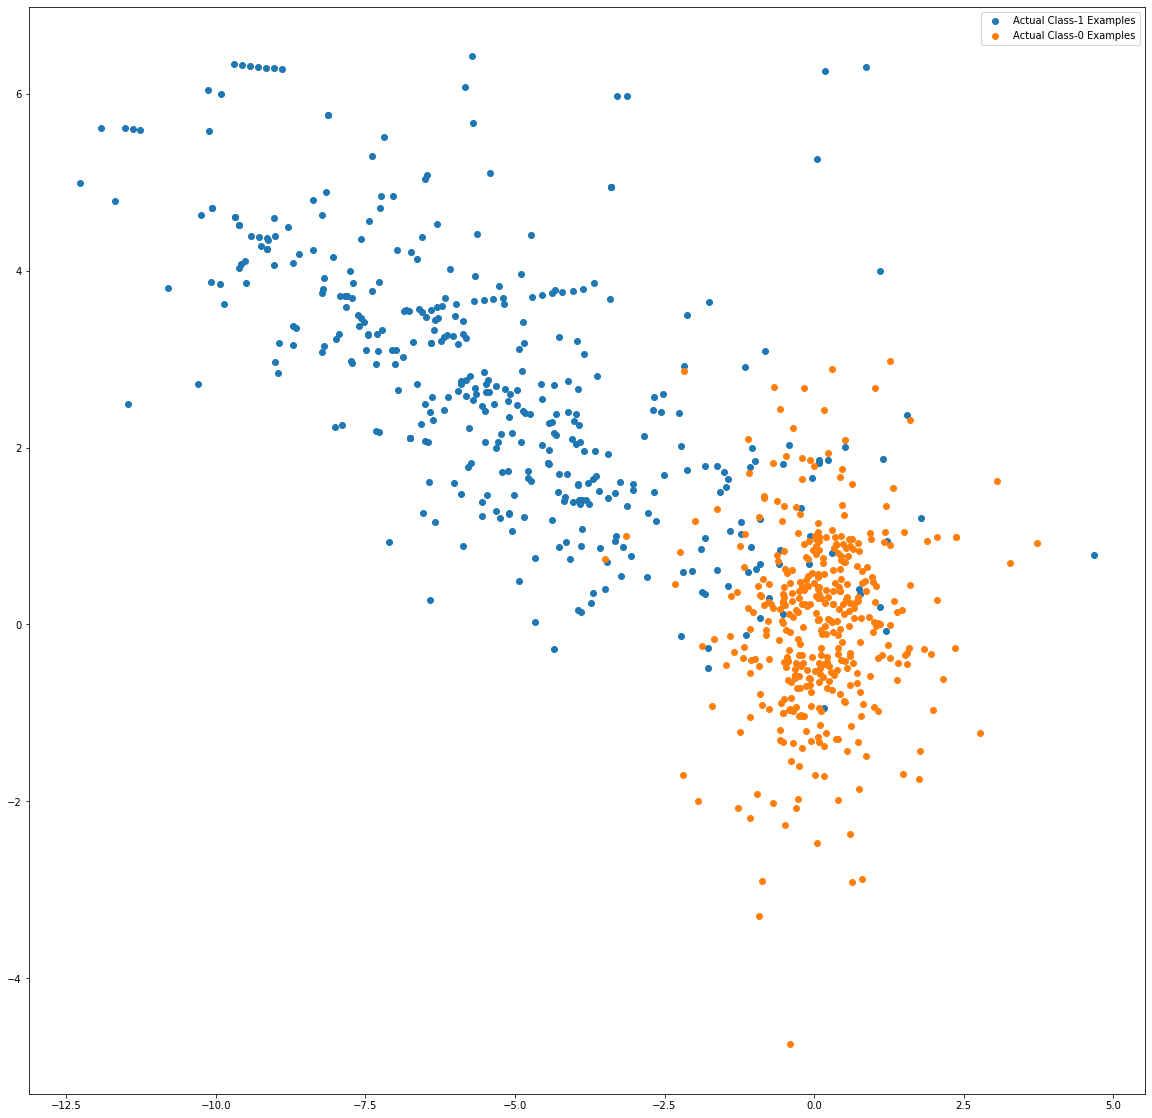

In [214]:
clf = xgb_adasyn_model

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [215]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.95904034


We have found that 89% is the threshold for which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data.

### Summary to the business

Here, we have to focus on a high recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions,

After performing several models, we have seen that in the balanced dataset with ADASYN technique the XGBoost model has good ROC score(99%) and also high Recall(86%). Hence, we can go with the XGBoost model here.